In [5]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data/house_price.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Preparation

In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.SaleCondition.value_counts() 

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [10]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
df.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500


## EDA

In [13]:
categorical_cols = df.dtypes[(df.dtypes == "object") | (df.dtypes == "string")].index
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
categorical_cols = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_cols))

numerical_cols = df.describe()
print("Number of Numerical features: ", len(numerical_cols))

Number of Categorical features:  43
Number of Numerical features:  8


## Categorical Analysis

### Structure of Land and Property

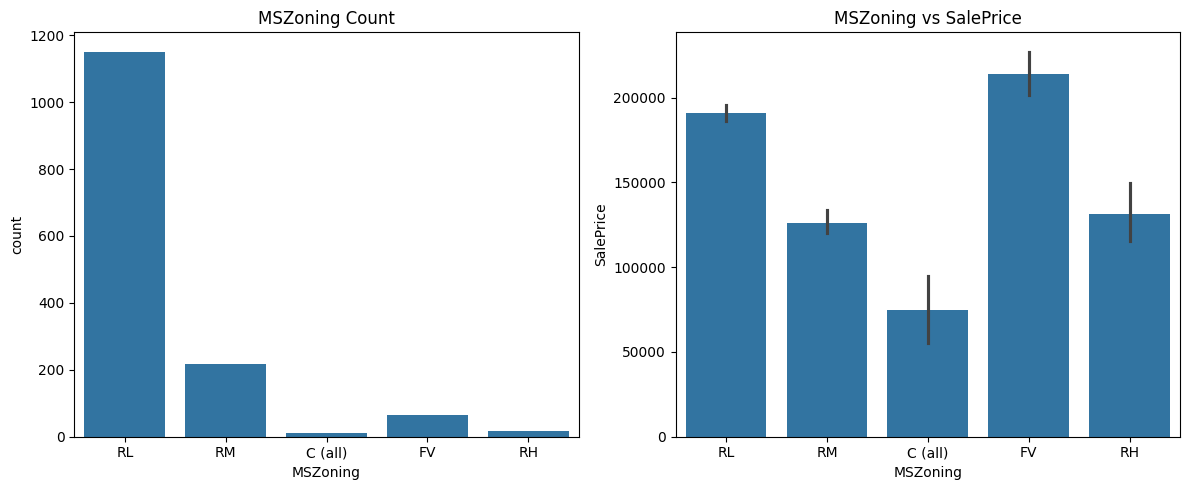

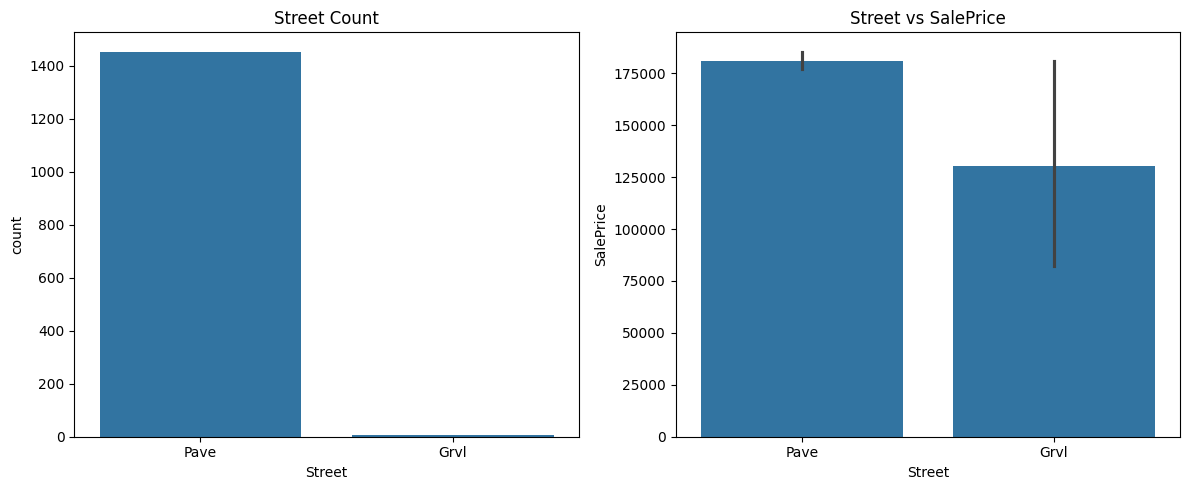

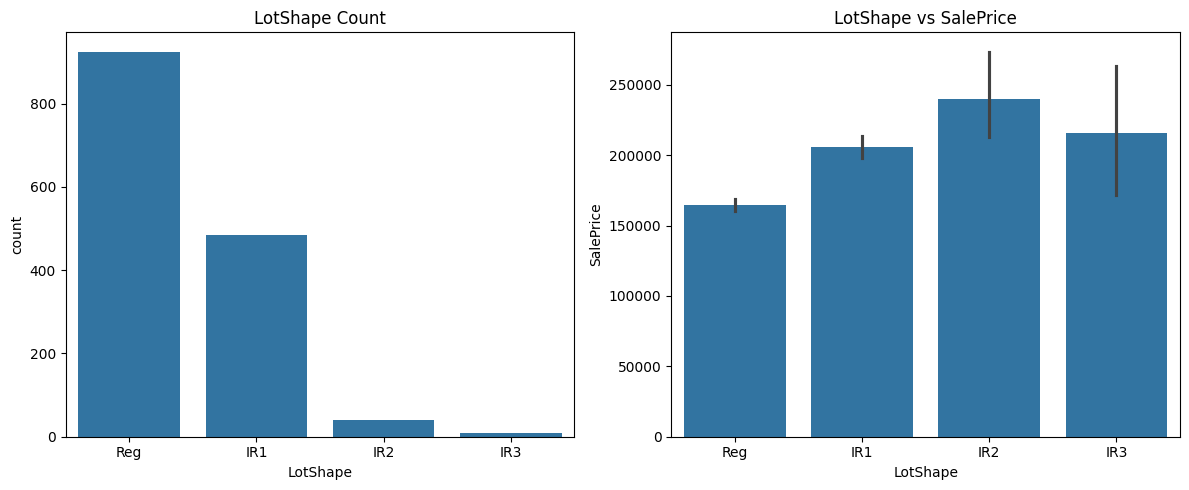

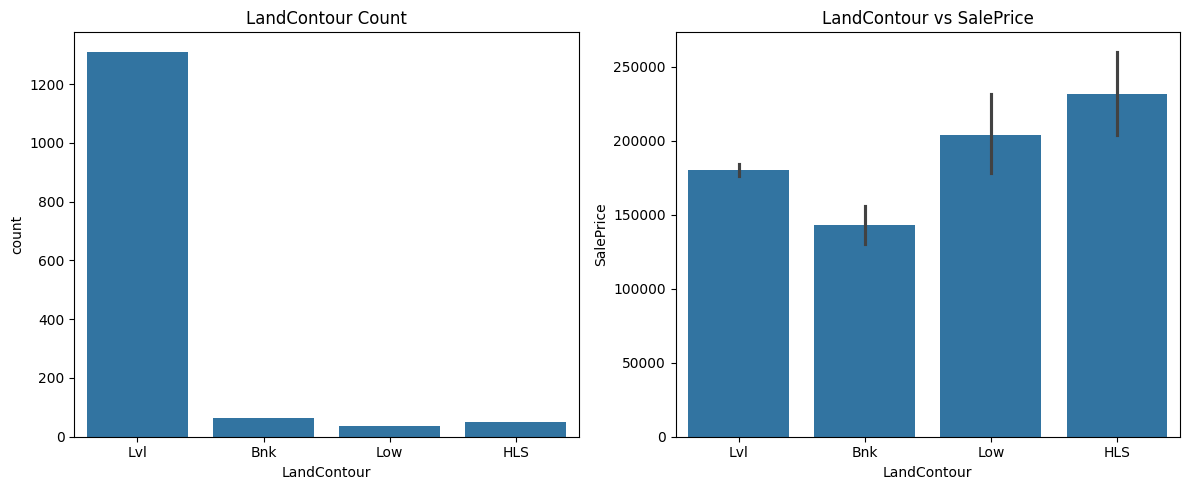

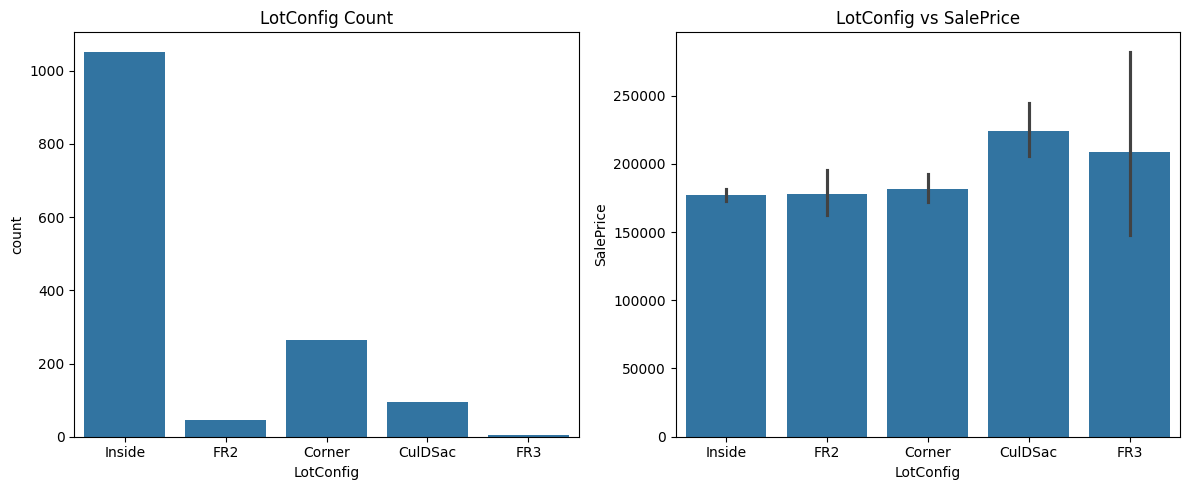

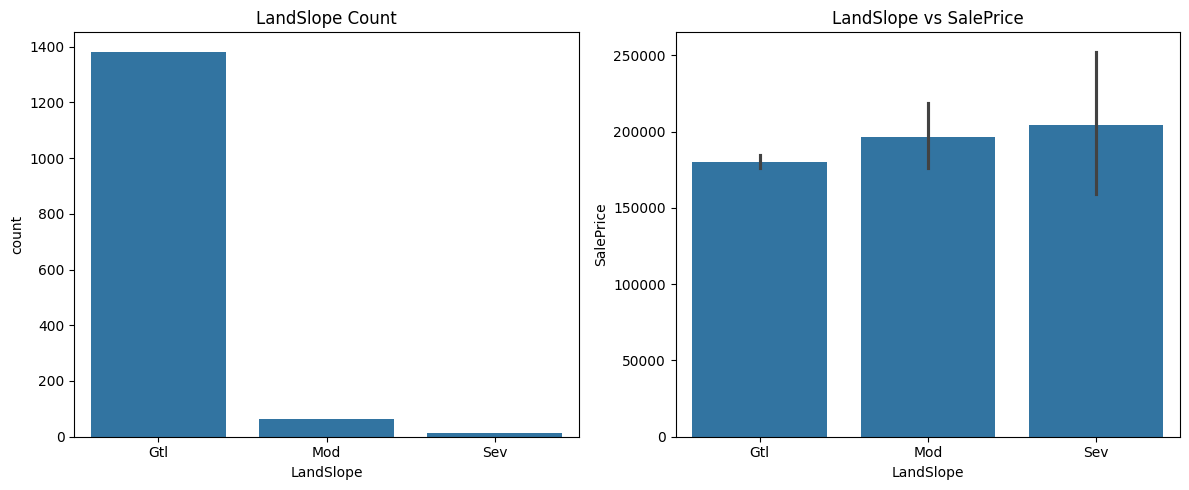

In [15]:
cat_cols_land = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope']

for feature in cat_cols_land:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    sns.countplot(data=df, x=feature, ax=axes[0])
    axes[0].set_title(f'{feature} Count')

    sns.barplot(data=df, x=feature, y='SalePrice', ax=axes[1])
    axes[1].set_title(f'{feature} vs SalePrice')

    plt.tight_layout()
    
    plt.show()

MSZoning:
- The Residential Low Density (RL) zone has a large number of around 1000 and above. Meanwhile, the smallest number is in the commercial zone. When compared with the selling price, the Floating Village (FV) zone has a higher selling price of around 200,000. Meanwhile the Commercial zone has the lowest selling price.

Land Contour:
- Houses with the highest land contours are level or flat, while there are only a few types of land contours such as cliffs or slopes (BNK), low, hills (HLS). When compared with the selling price, houses that have a significant slope on both sides (HLS) or are almost flat (Low), the selling price is higher. For Stressed and Turned slopes, Selling Prices decrease.

Road :
- The number of asphalt roads is much greater than the number of gravel roads. Next, compare it with the selling price. For paved road access prices are higher and most houses with gravel roads have low prices.

LotShape :
- The type of house with a regular shape has the largest number. But it can be seen that houses with regular shapes have cheap prices. And as irregularity increases, the average selling price of these homes also increases.

LotConfig :
- The number of houses located within the block (not on the corner or on the side of the road) has the largest number. Meanwhile, the plot configuration does not seem to change the price significantly. Properties with Cul de Sac (street or alley closed at one end) and FR3 (Frontage on 3 sides of the property) configurations average higher scores than other configurations.

Land Slope:
- The number of houses that have a gentle slope is greater. However, when compared to the selling price, most properties have a gentle slope and are the cheapest, while properties with a moderate or heavy slope have a higher value.

Conclusion : Residential Low Density (RL) zones are the main choice with the largest number of properties, while commercial zones have fewer properties. In terms of selling prices, Floating Village (FV) zones stand out with the highest values, while commercial zones tend to have lower selling prices. Flat or level land contours dominate, but properties with a significant slope or almost flat have a higher selling price. Paved road access is more common and correlates with higher selling prices compared to gravel roads. Properties with regular landforms and Cul de Sac and FR3 configurations tend to have higher values. In addition, moderate or heavy slopes of land tend to provide higher value, while sloping land tends to have a lower selling price.

### Location and Style

In [18]:
table = df.groupby(['Neighborhood'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Reds')

,Neighborhood,SalePrice
16,NridgHt,315000.000000
15,NoRidge,301500.000000
22,StoneBr,278000.000000
23,Timber,228475.000000
21,Somerst,225500.000000
24,Veenker,218000.000000
6,Crawfor,200624.000000
4,ClearCr,200250.000000
5,CollgCr,197200.000000
0,Blmngtn,191000.000000


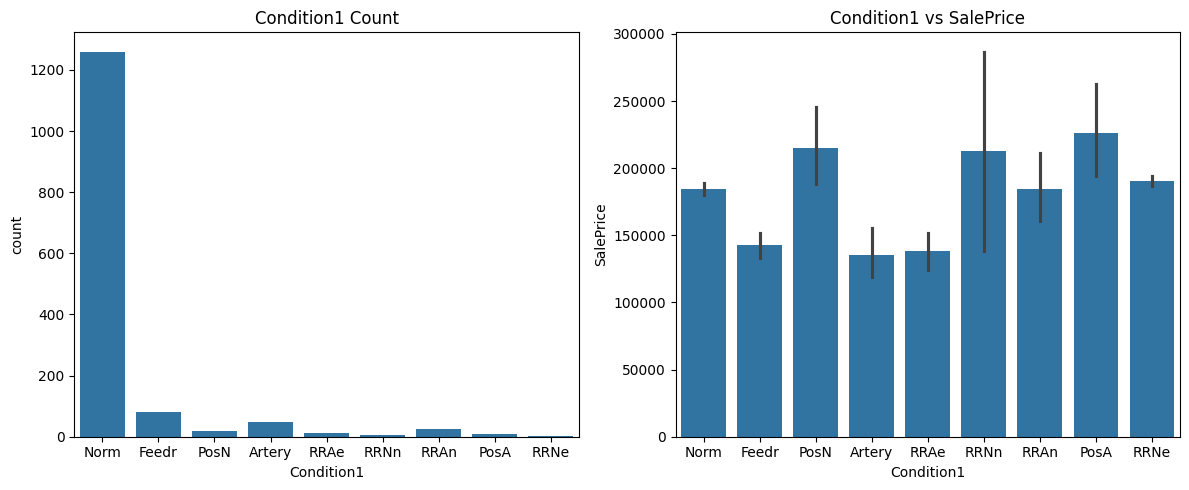

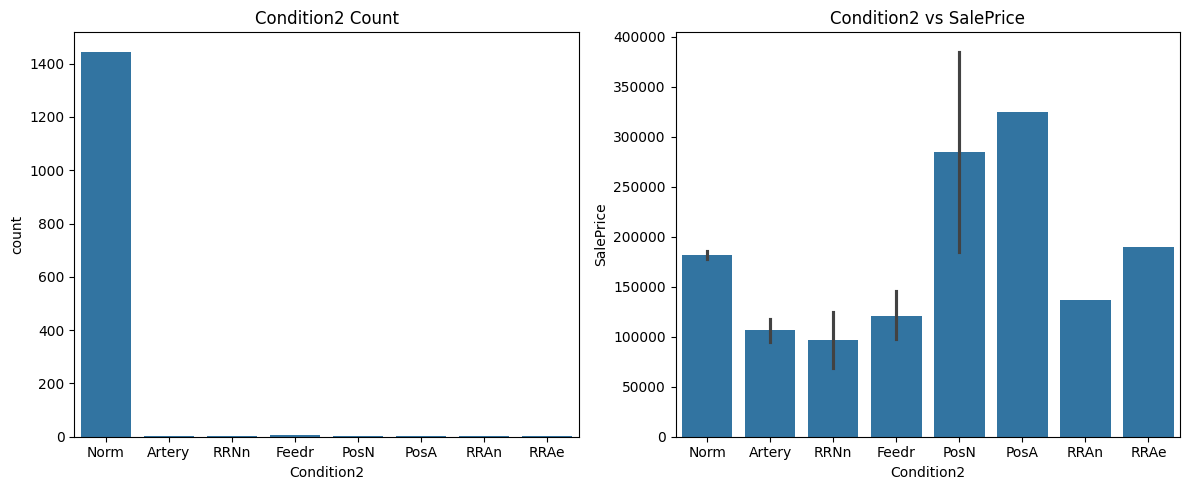

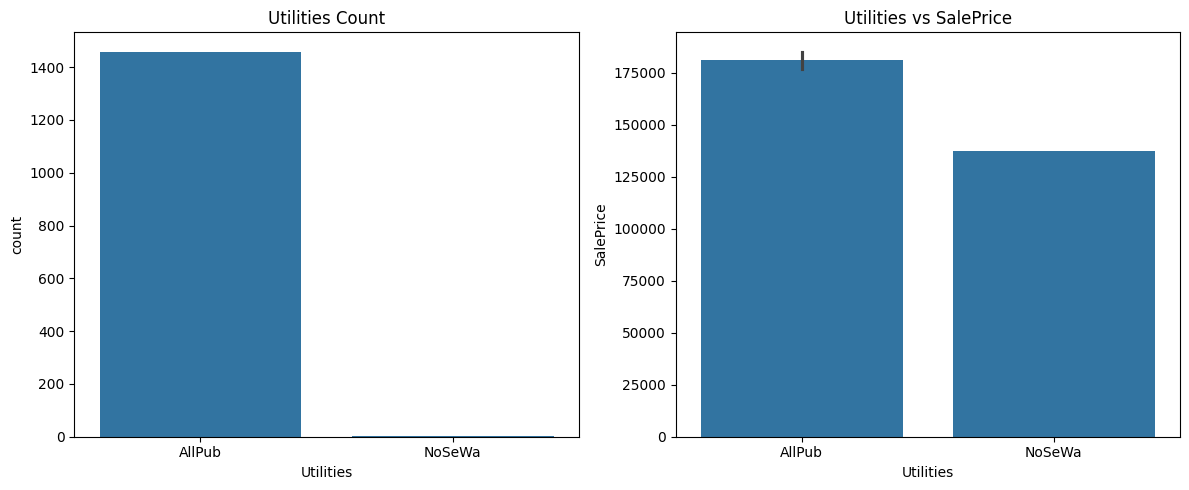

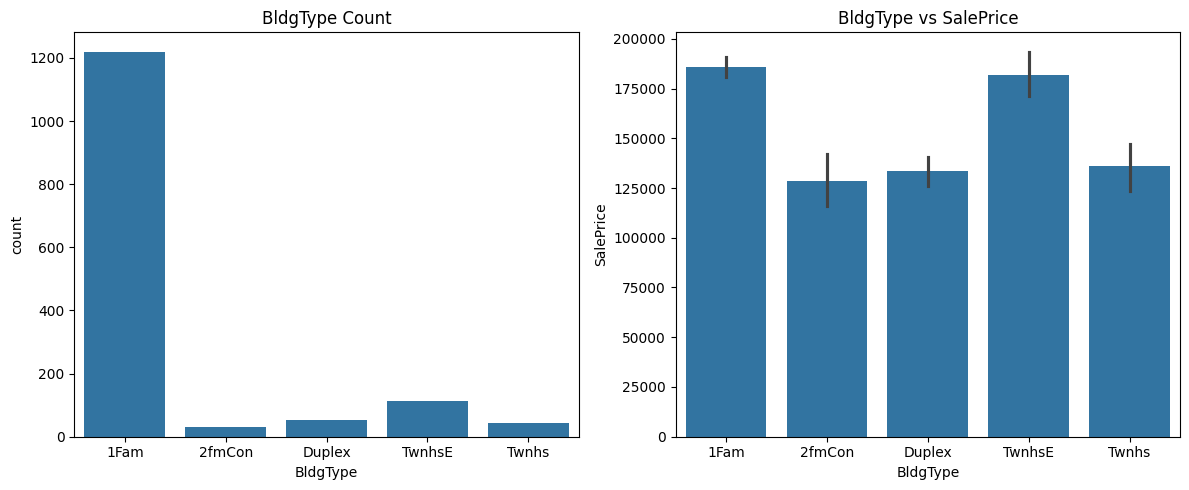

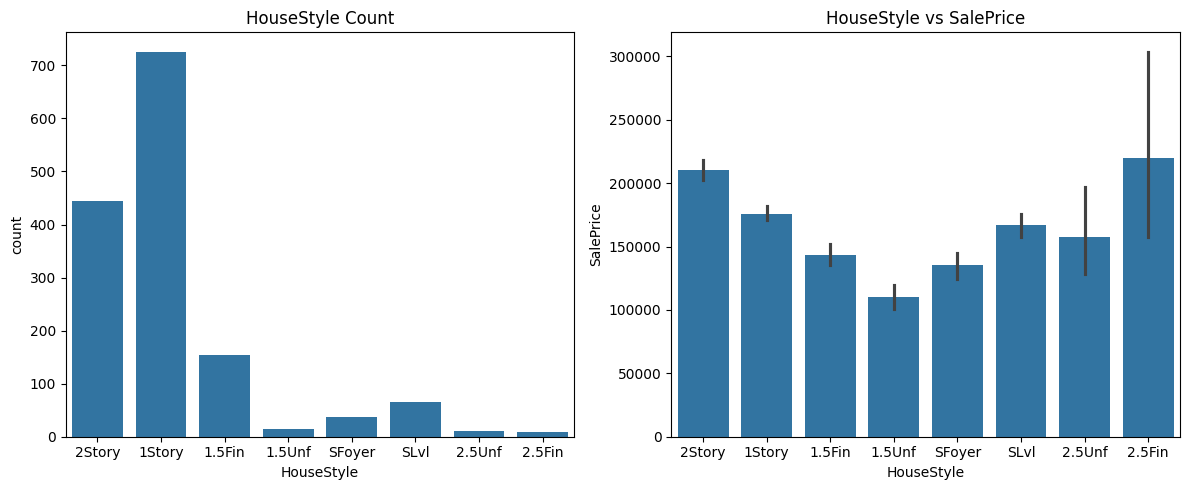

In [19]:
cat_cols_land_2= ['Condition1', 'Condition2','Utilities','BldgType', 'HouseStyle']

for feature in cat_cols_land_2:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    sns.countplot(data=df, x=feature, ax=axes[0])
    axes[0].set_title(f'{feature} Count')

    sns.barplot(data=df, x=feature, y='SalePrice', ax=axes[1])
    axes[1].set_title(f'{feature} vs SalePrice')

    plt.tight_layout()
    
    plt.show()

Conditions 1 and 2:
- In Conditions 1 and 2 under normal circumstances there are the most interest, but when compared with the selling price, proximity to conditions such as highways reduces the selling price and with railways, the price becomes high.

Building Type:
- Single-family detached residences have a lot of interest and these residences have higher selling prices than duplexes, two-family houses, and townhouse residences

House Style:
- The 1-storey house style has the highest number, when compared with the selling price, so 2-storey and 1-storey houses have the highest selling price than unfinished properties.


Conclusion: In Conditions 1 and 2, properties with normal conditions have the highest interest, however, proximity to the main road has the effect of reducing the selling price, while proximity to the railway increases the selling price. Building type also plays a role, with single-family detached residences being a top choice with high interest and higher selling prices compared to other types such as duplexes, two-family homes and townhouses. The 1-story house style dominates by the largest number, and when compared with selling prices, 1-story and 2-story houses have the highest selling prices compared to unfinished properties.

### Roofing,Foundation and housing exterior

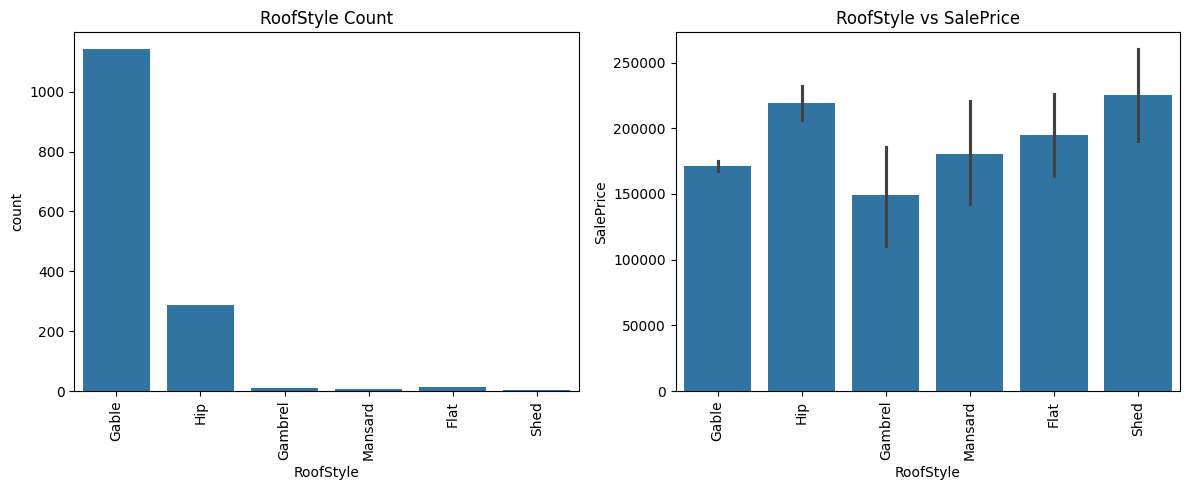

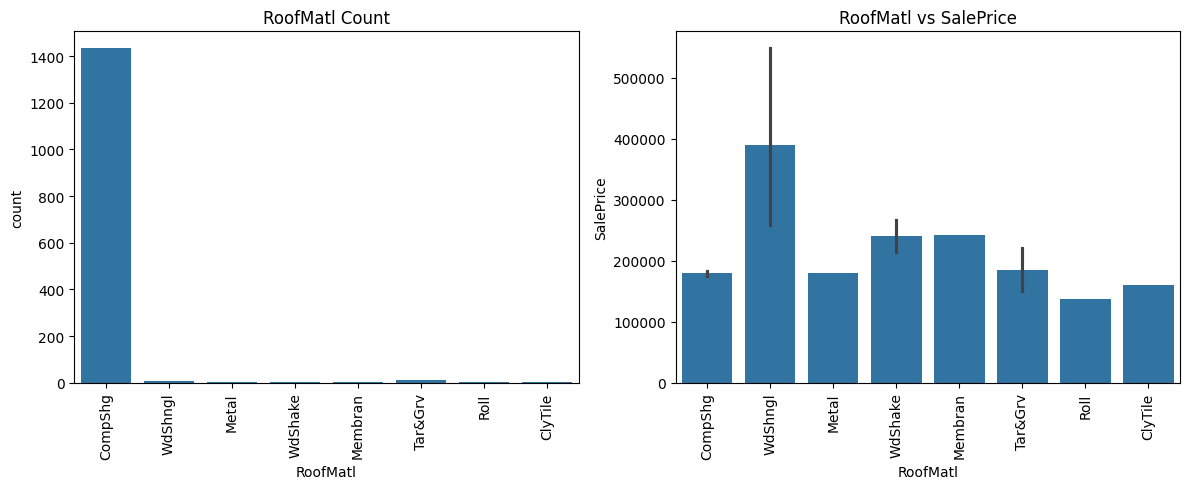

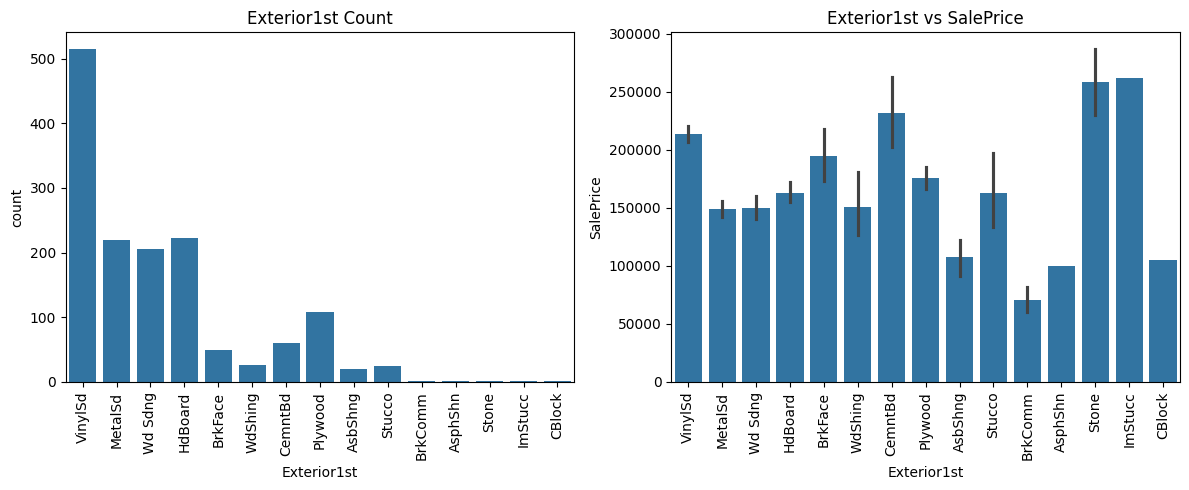

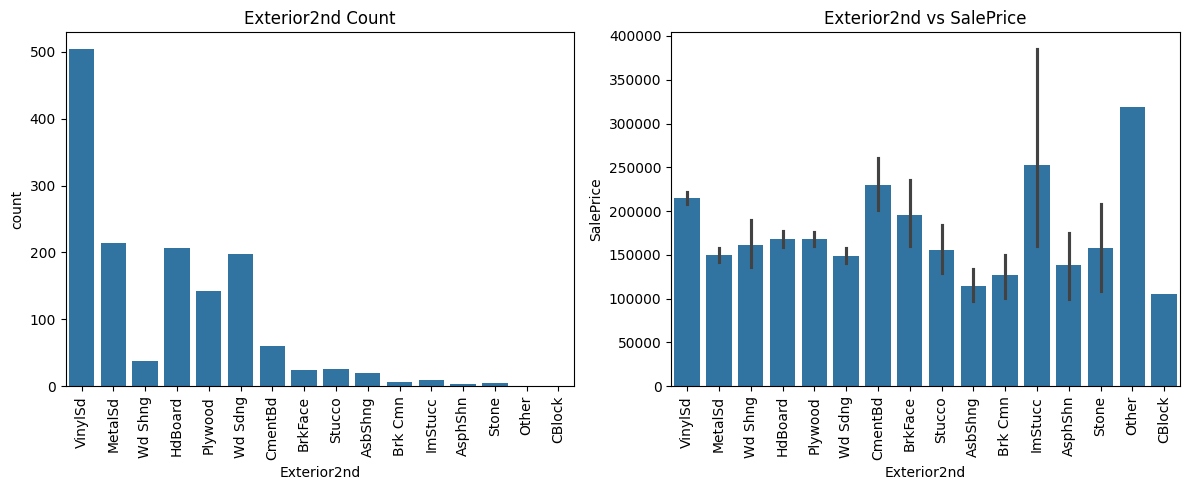

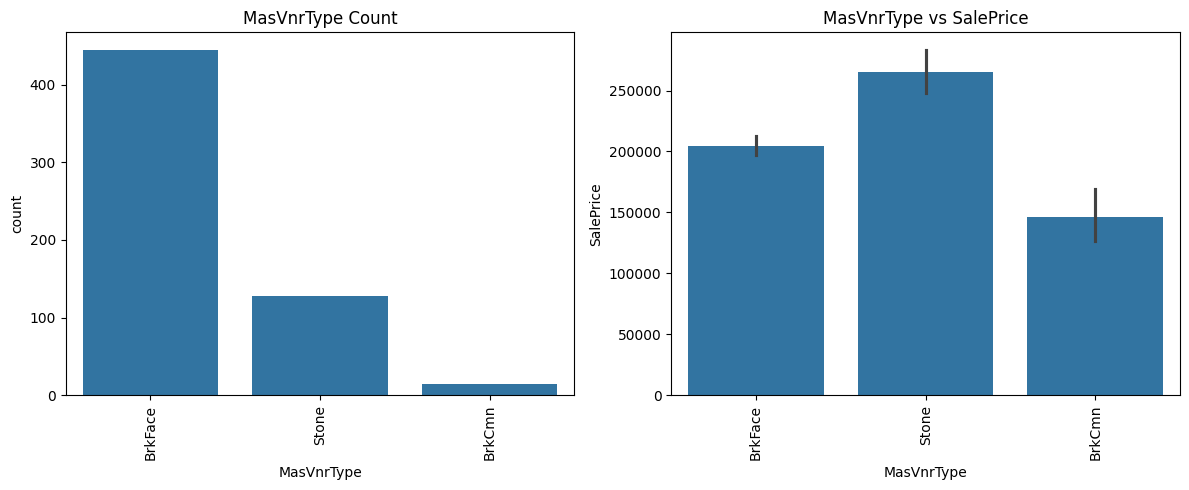

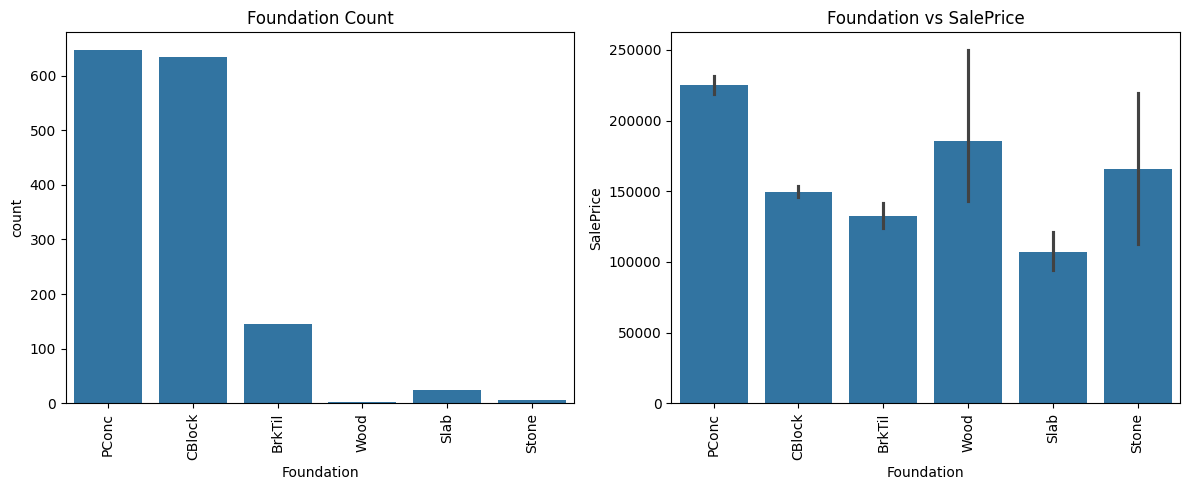

In [20]:
cat_cols_land_3 = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation']

for feature in cat_cols_land_3:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    sns.countplot(data=df, x=feature, ax=axes[0])
    axes[0].set_title(f'{feature} Count')
    axes[0].tick_params(axis='x', rotation=90)

    sns.barplot(data=df, x=feature, y='SalePrice', ax=axes[1])
    axes[1].set_title(f'{feature} vs SalePrice')
    axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

Exteriors 1 and 2 with Vinyl Coating have the largest number, you can see the difference in selling prices for the exterior covering of the house.
Plaster, Stone, Imitation Cement Board coverings have a high value in determining the selling price, while the lowest value is for ordinary brick coverings.
2nd Exterior: - Having a lot of materials changes the price of the house. The value of stone is down while Cement board and Vinyl Siding are about the same price.

Roof Style: The gable roof type is the most common type of house roof style. Most homes have gable and hip roof styles and the average selling price is 150000. The highest average selling price is for properties that have a shed roof model and the lowest selling price.

### Exterior Condition and Quality

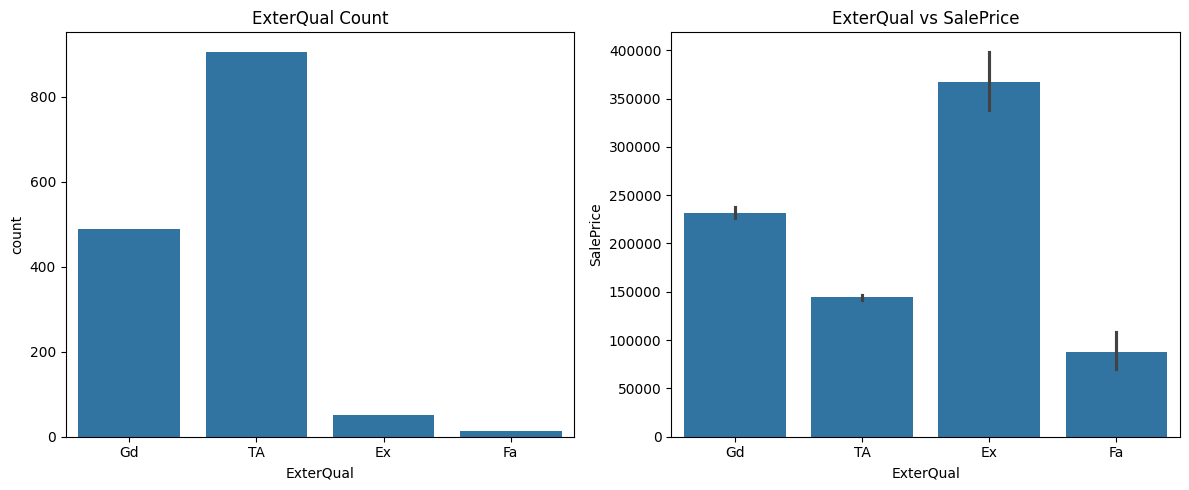

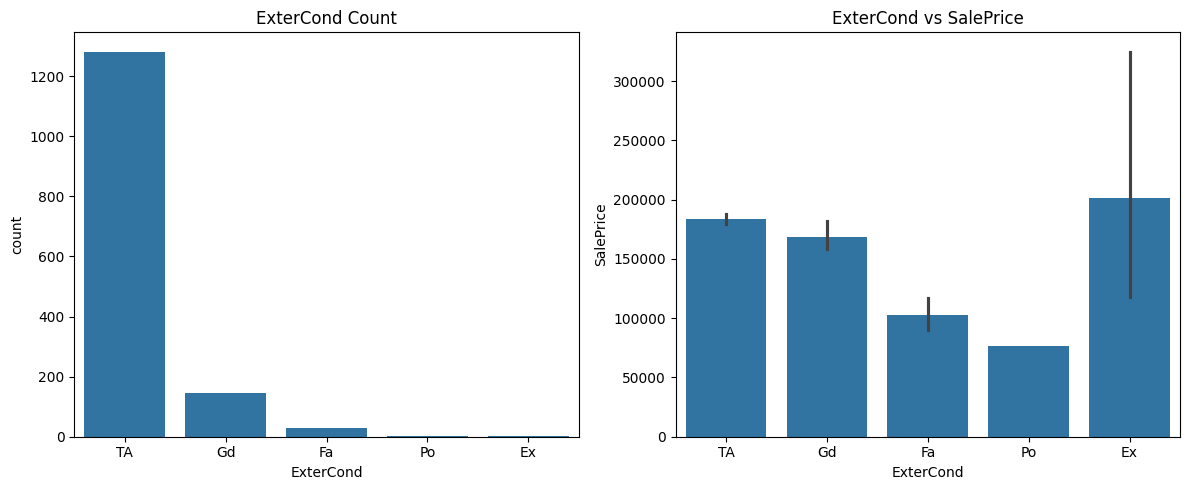

In [21]:
cat_cols_land_4 = ['ExterQual', 'ExterCond']

for feature in cat_cols_land_4:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    sns.countplot(data=df, x=feature, ax=axes[0])
    axes[0].set_title(f'{feature} Count')
    # axes[0].tick_params(axis='x', rotation=90)

    sns.barplot(data=df, x=feature, y='SalePrice', ax=axes[1])
    axes[1].set_title(f'{feature} vs SalePrice')
    # axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

Exterior Quality:
- If the exterior quality is good or excellent, the price will be more expensive. Most properties have average exterior quality and very few have excellent exterior quality.

Exterior Condition:
- Properties with average, good and excellent exterior conditions will have a higher selling price. And here also most of the properties have average exterior condition and only 3 properties in the data set have excellent exterior condition.

### Basements

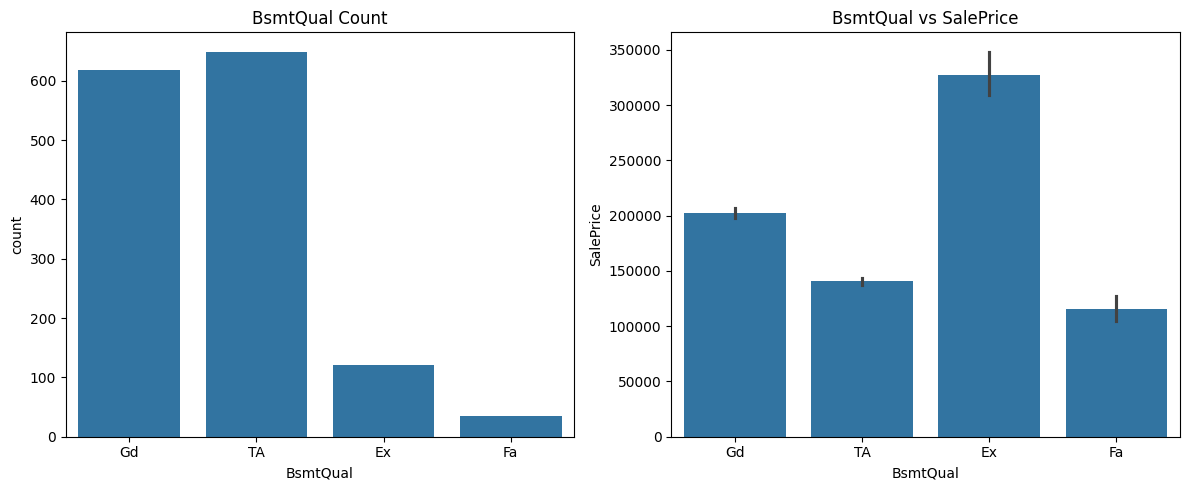

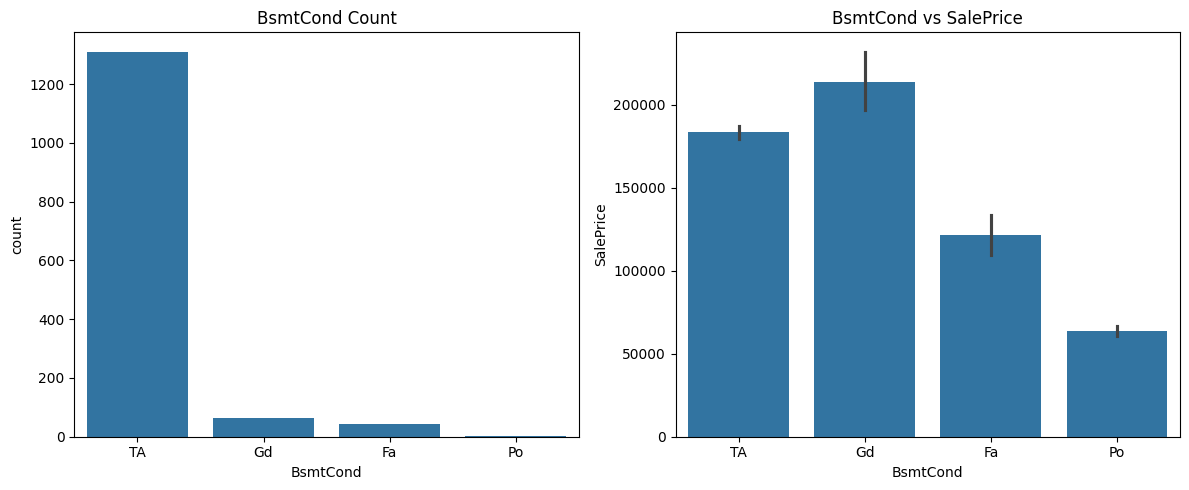

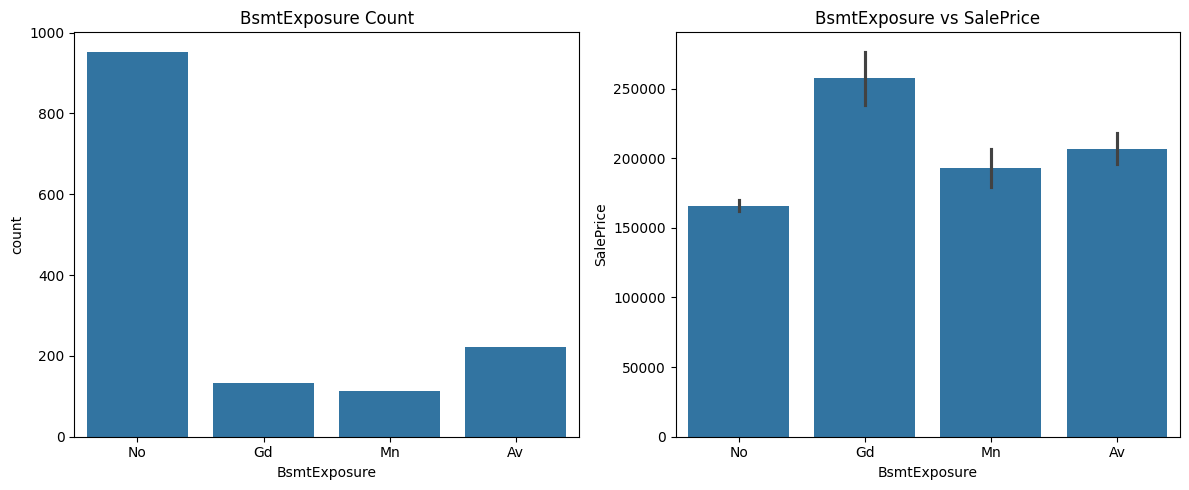

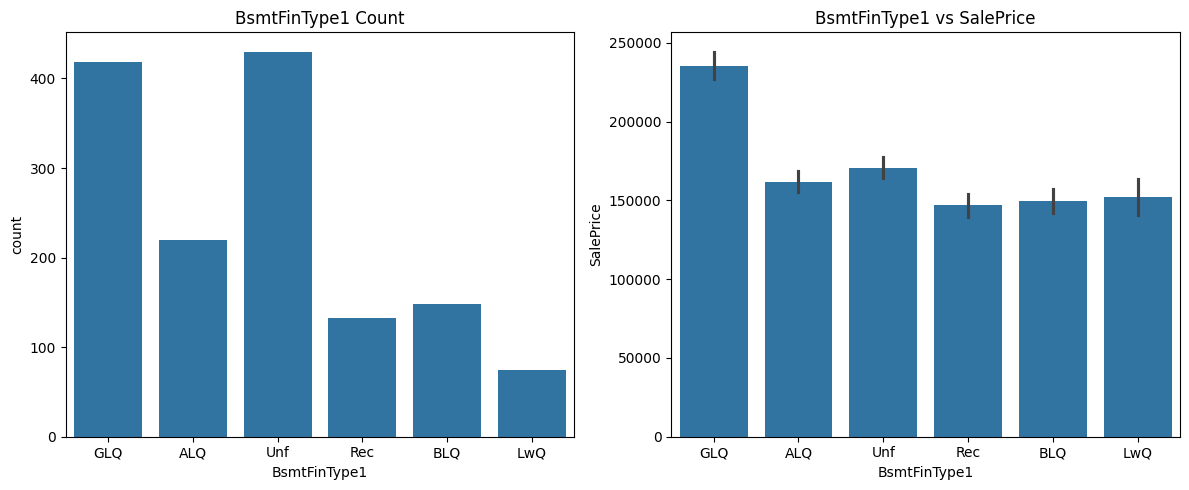

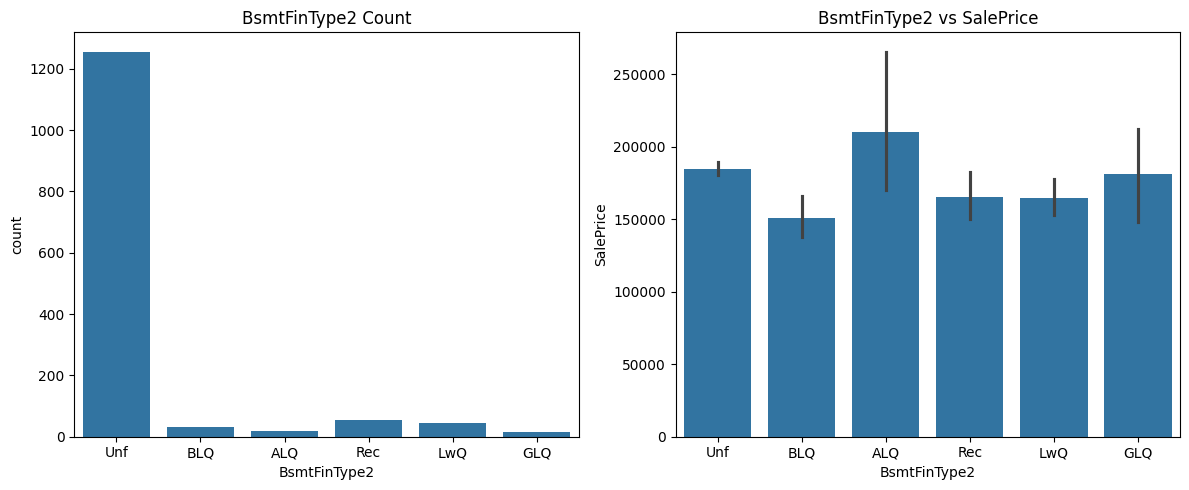

In [22]:
cat_cols_land_4 = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for feature in cat_cols_land_4:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    sns.countplot(data=df, x=feature, ax=axes[0])
    axes[0].set_title(f'{feature} Count')
    # axes[0].tick_params(axis='x', rotation=90)

    sns.barplot(data=df, x=feature, y='SalePrice', ax=axes[1])
    axes[1].set_title(f'{feature} vs SalePrice')
    # axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

Basement Quality:
- Basement quality refers to the height of the basement. So excellent means more than 100 inches and poor means less than 70 inches.
So a property with a good quality basement will have a higher selling price.

Basement Exposure:
- Basements with good exposure to the garden or walkouts have higher selling prices and properties without basements or those with no exposure have lower selling prices.

Basement Condition:
- Average and Good conditions have higher selling prices as seen in other cases.

Basement types 1 and 2::
- Good, average residences and unfinished basements have a higher average sales price in both type 1 and type 2 and below average finishes will obviously have a lower value.

### Heating and Air Conditioning

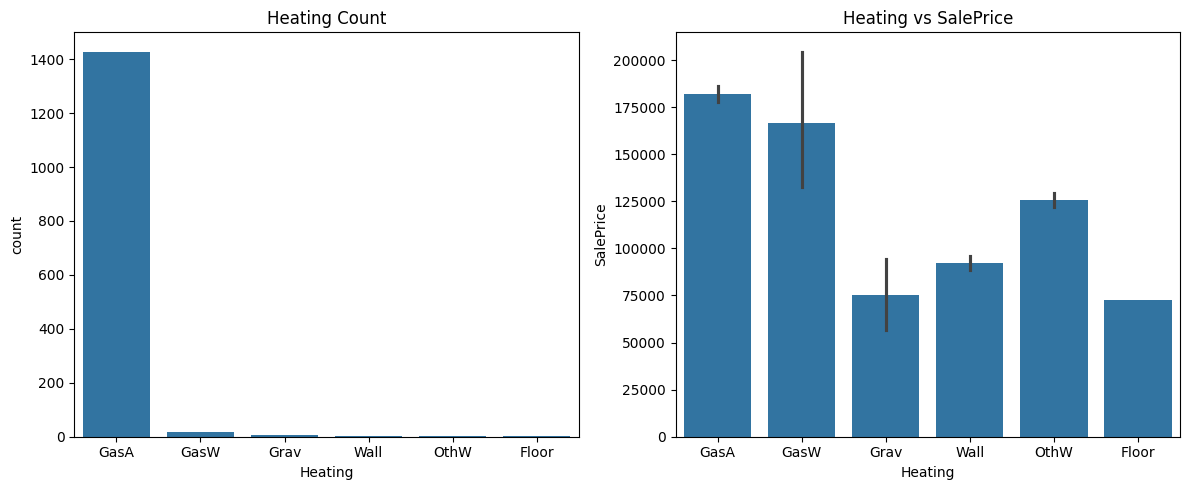

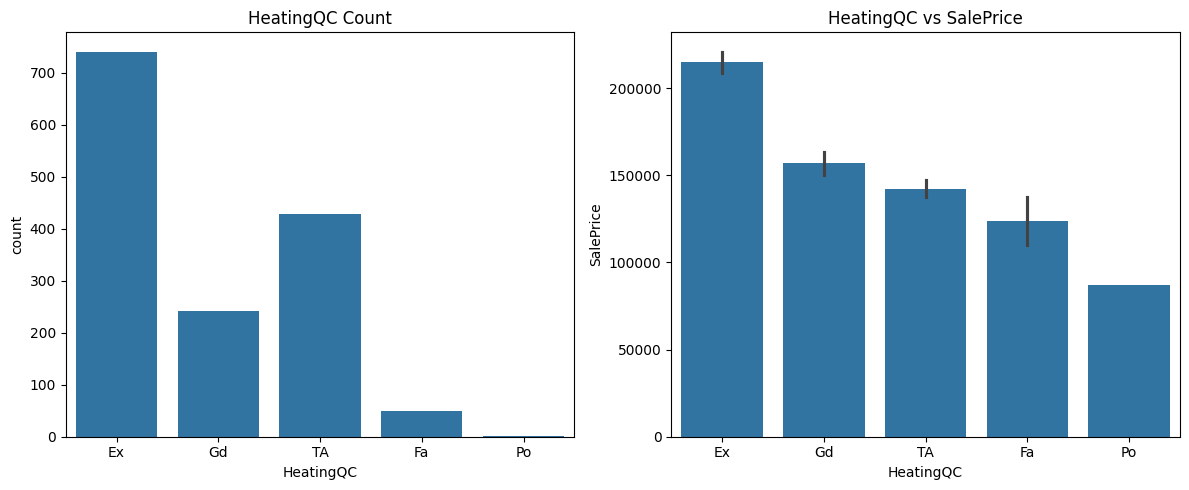

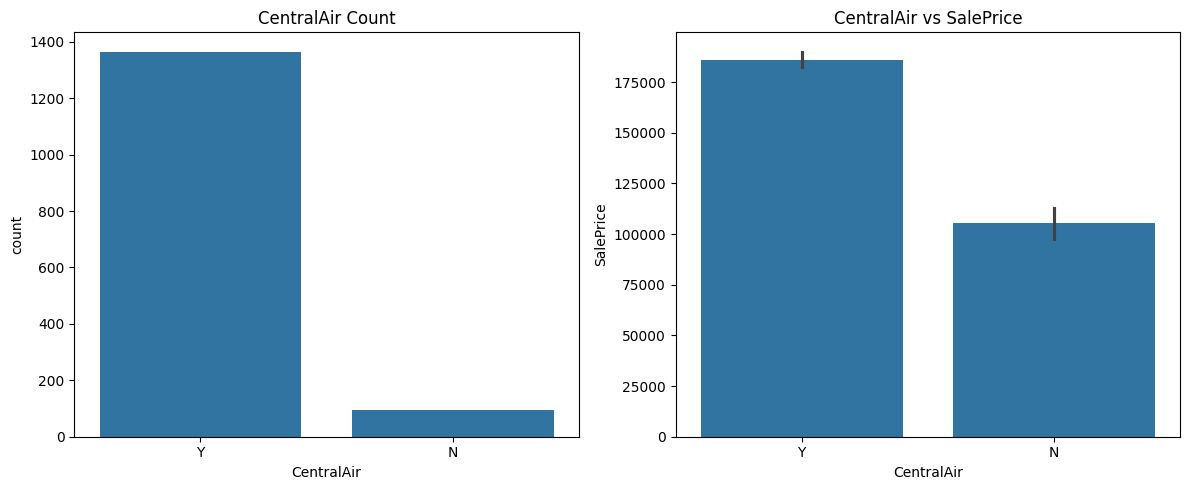

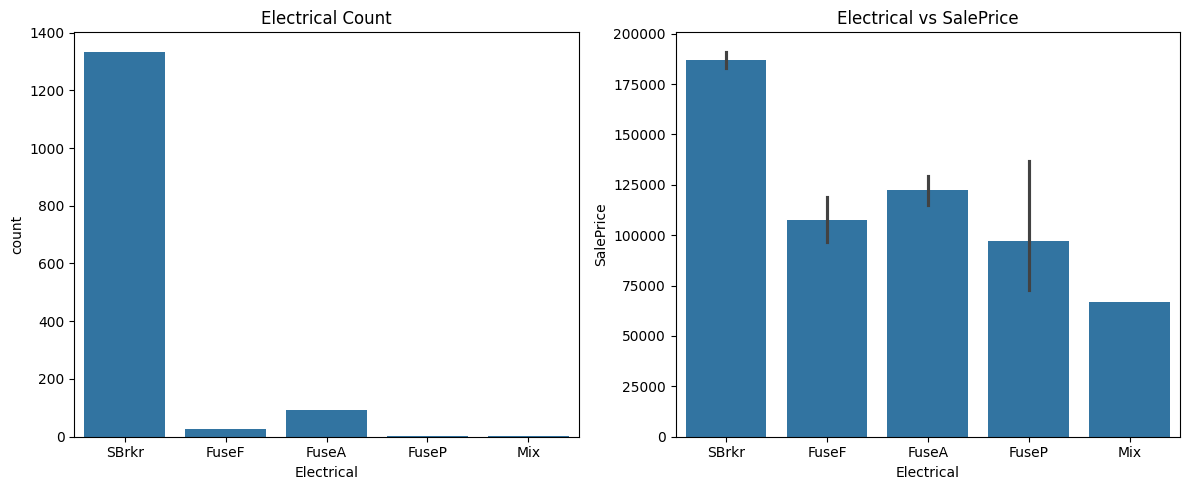

In [23]:
cat_cols_land_5 = ['Heating', 'HeatingQC', 'CentralAir','Electrical']

for feature in cat_cols_land_5:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    sns.countplot(data=df, x=feature, ax=axes[0])
    axes[0].set_title(f'{feature} Count')
    # axes[0].tick_params(axis='x', rotation=90)

    sns.barplot(data=df, x=feature, y='SalePrice', ax=axes[1])
    axes[1].set_title(f'{feature} vs SalePrice')
    # axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

Electrical:
- Most properties have standard circuit breakers and have the highest average sales price of 170,000.
Properties with poor fuse box systems and mixed systems have sale prices of less than 100,000.

Warmup :
- Wall heating or hot water/steam are associated with low house prices. Gases formed in warm air appear to push selling prices higher.

Central AC:
- Most properties are AC, and those that have AC will be more expensive than those that don't have it.

### Garage

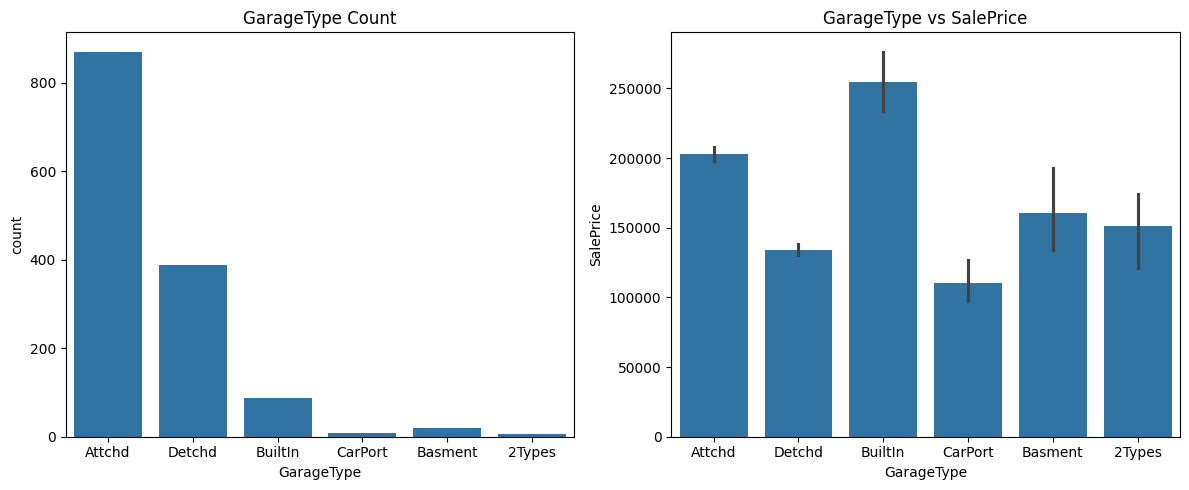

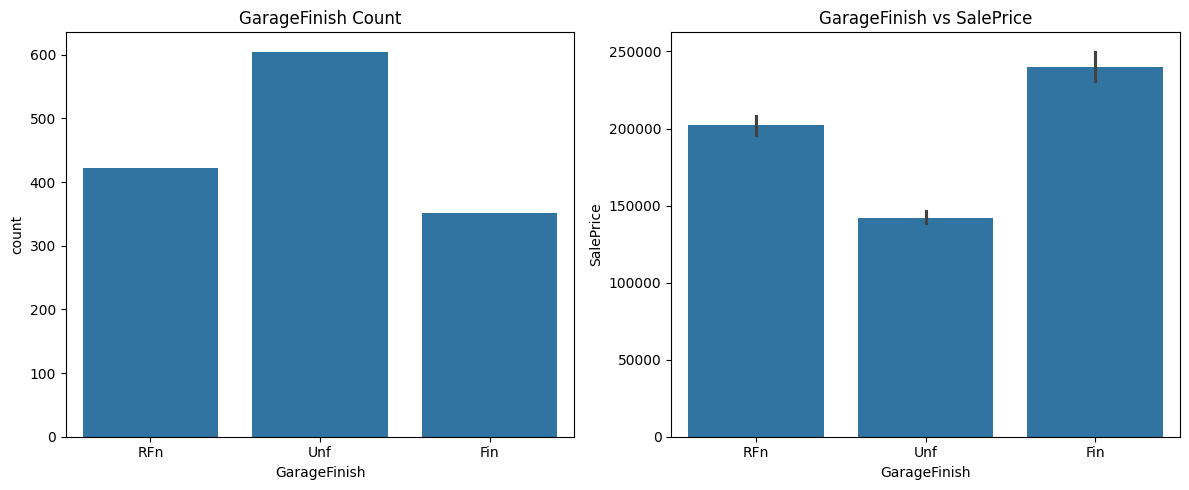

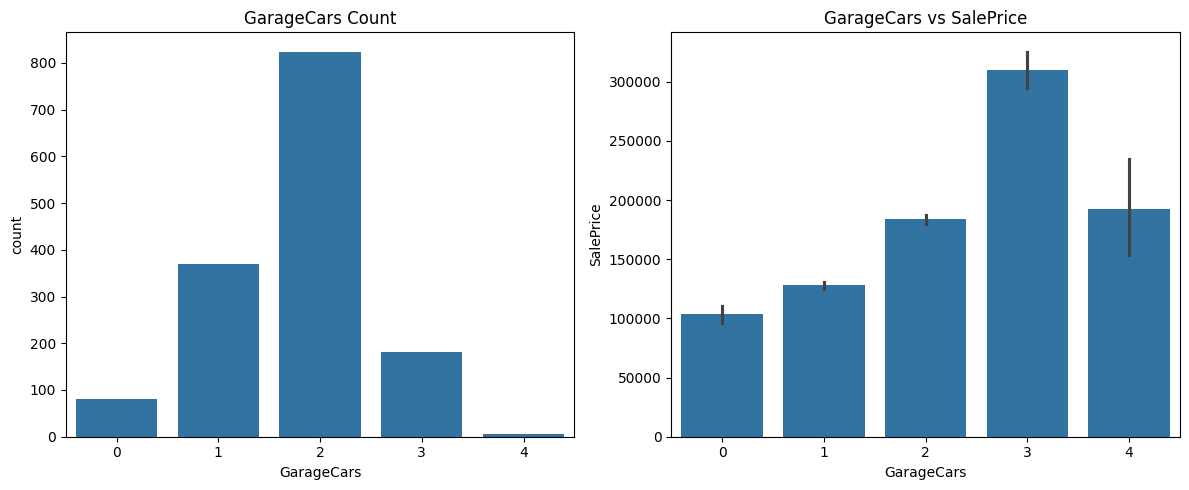

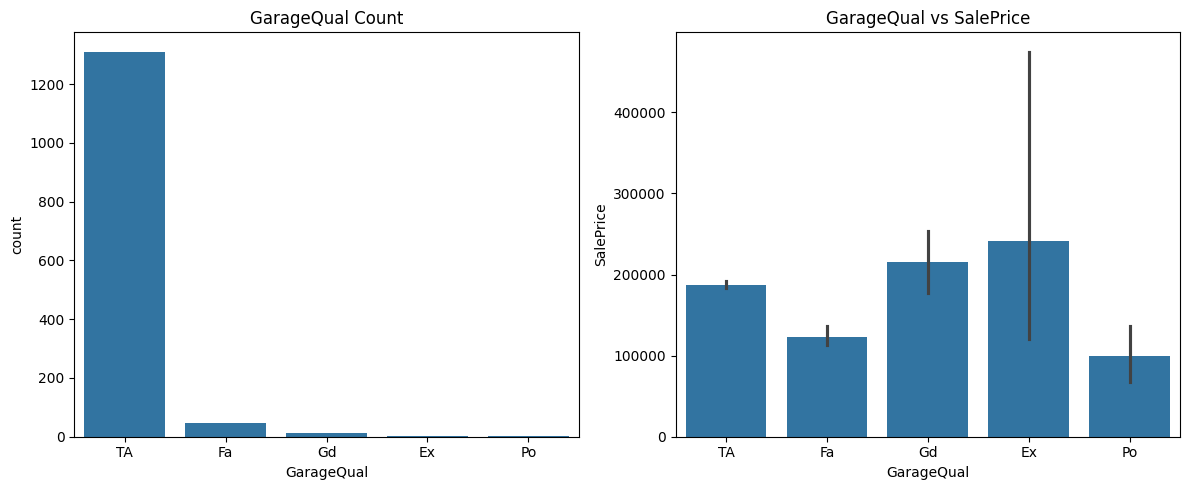

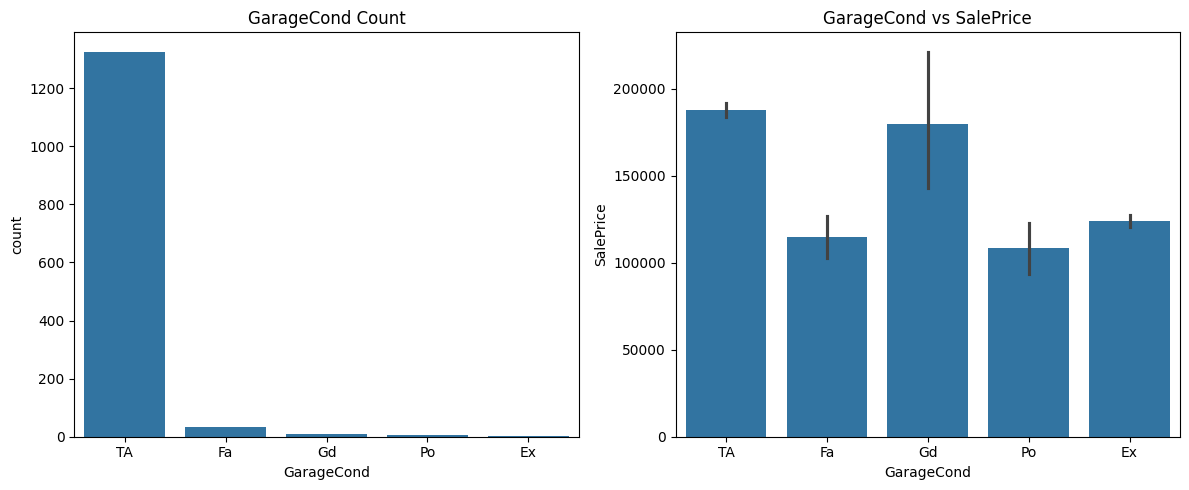

In [24]:
cat_cols_land_6 = ['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']

for feature in cat_cols_land_6:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    sns.countplot(data=df, x=feature, ax=axes[0])
    axes[0].set_title(f'{feature} Count')
    # axes[0].tick_params(axis='x', rotation=90)

    sns.barplot(data=df, x=feature, y='SalePrice', ax=axes[1])
    axes[1].set_title(f'{feature} vs SalePrice')
    # axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

Garage Type:
- Homes with attached garages tend to command the highest prices. Those that don't have a garage or car port tend to have the cheapest prices.

Garage Finish:
- Finished and approximately finished garages have a higher selling price than unfinished ones. And properties that don't have a garage have the cheapest prices, but this type mostly doesn't have a garage

GarageCars :
- Here car garage refers to the size of the garage in terms of car capacity. So the higher the number, the greater the selling price.

### Sale Type and Condition

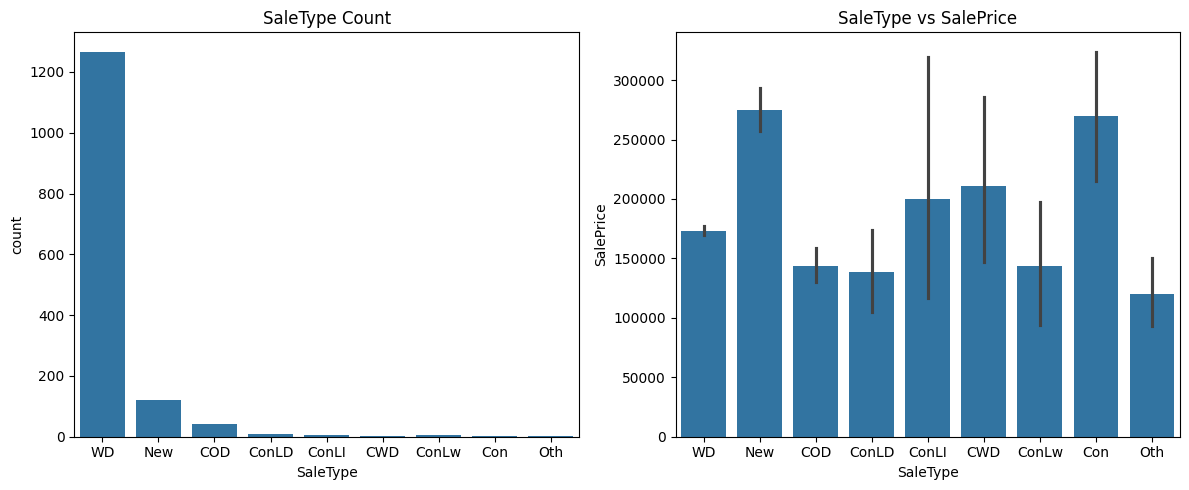

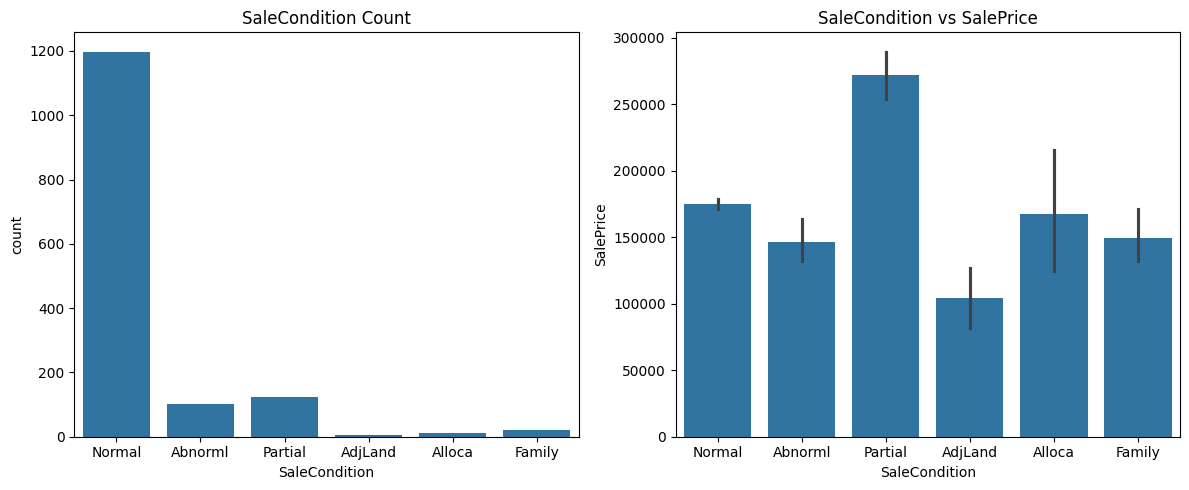

In [26]:
cat_cols_land_7 = ['SaleType','SaleCondition']
for feature in cat_cols_land_7:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    sns.countplot(data=df, x=feature, ax=axes[0])
    axes[0].set_title(f'{feature} Count')
    # axes[0].tick_params(axis='x', rotation=90)

    sns.barplot(data=df, x=feature, y='SalePrice', ax=axes[1])
    axes[1].set_title(f'{feature} vs SalePrice')
    # axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

Sales Type:
- Most properties are under warranty deed sale. Homes where homes are for sale seem to have different price ranges.

Sale Condition:
- There are more houses in normal condition. If the house for sale is in partial or normal condition, the price will definitely be higher than in other conditions.

## Numerical Analysis

### Discrete Numerical Analysis

In [27]:
discrete=[]
for col in df.columns:
    if df[col].dtype=='int64' :
        discrete.append(col)

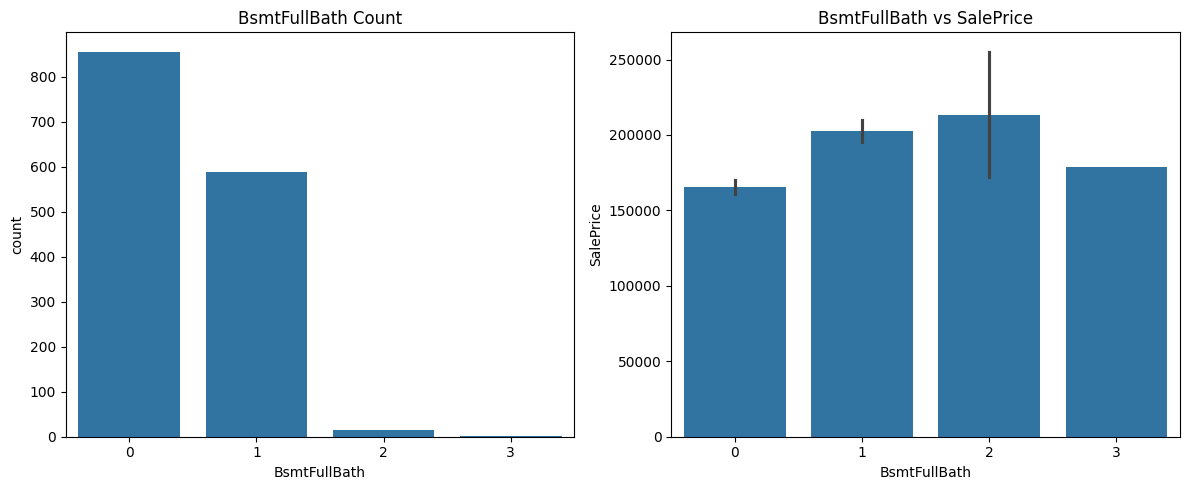

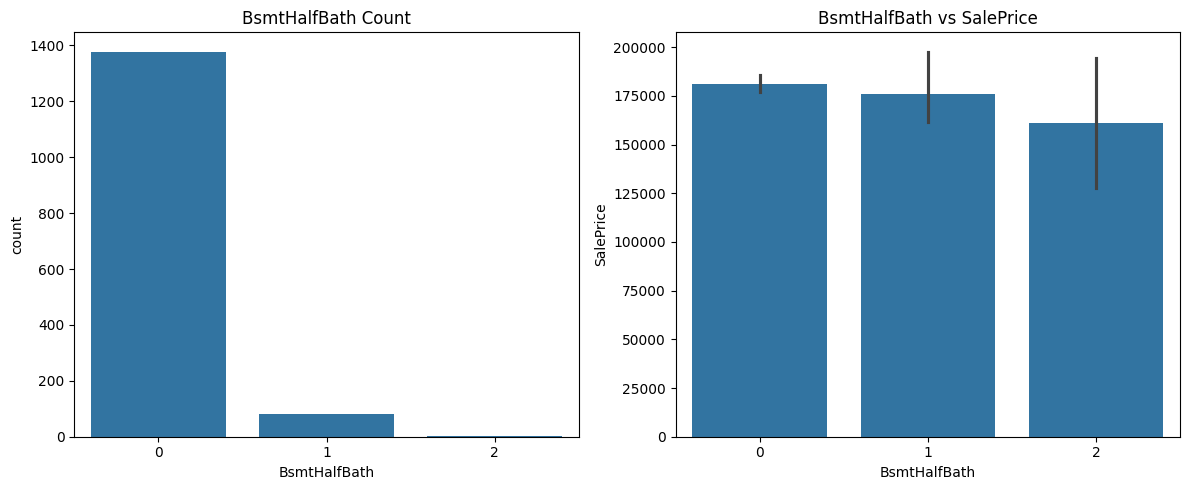

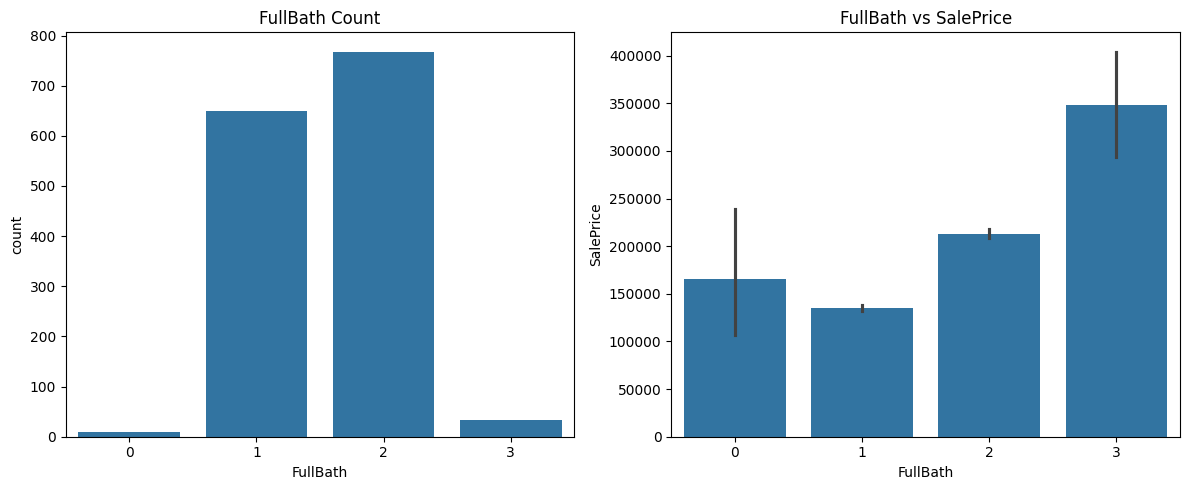

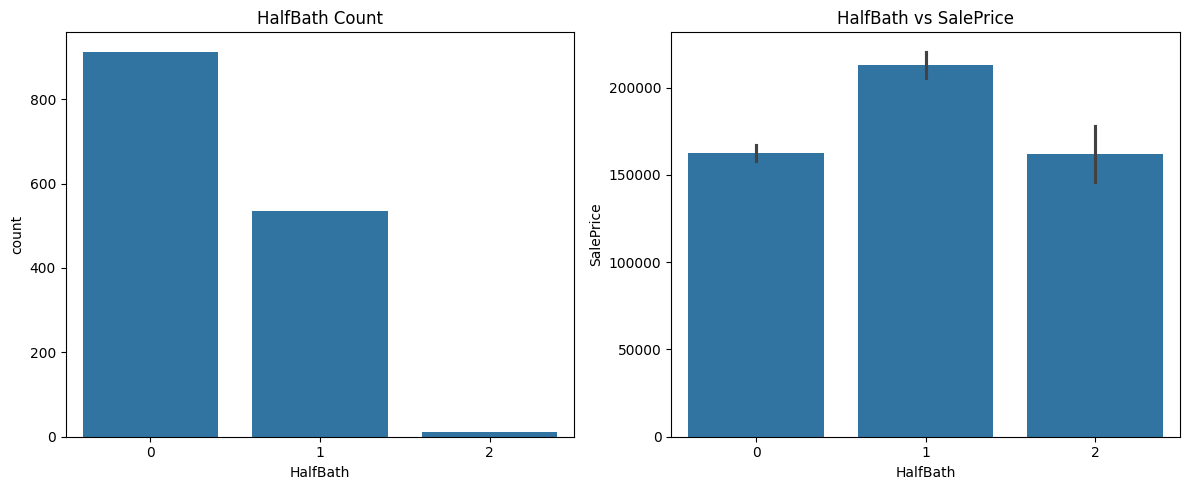

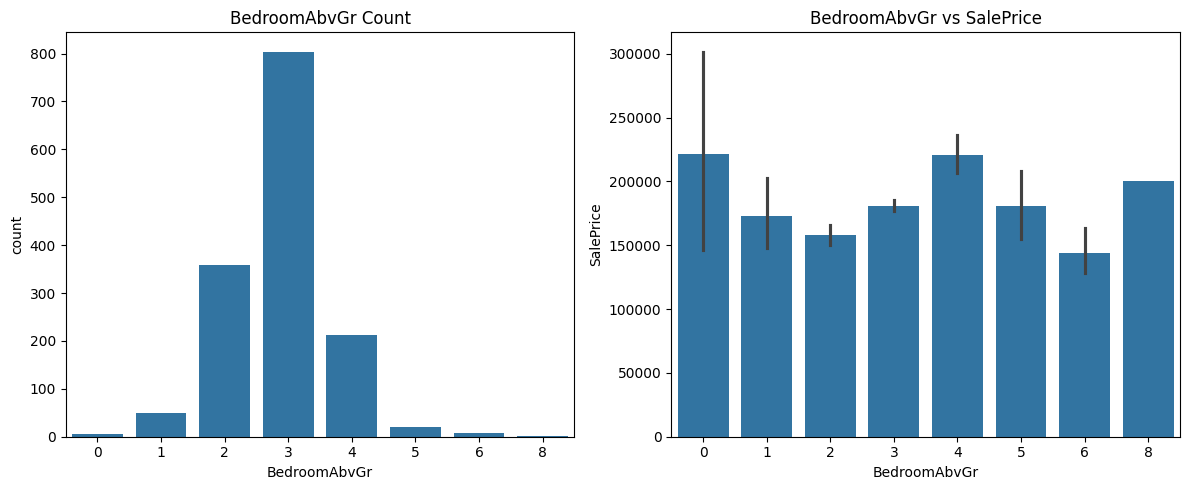

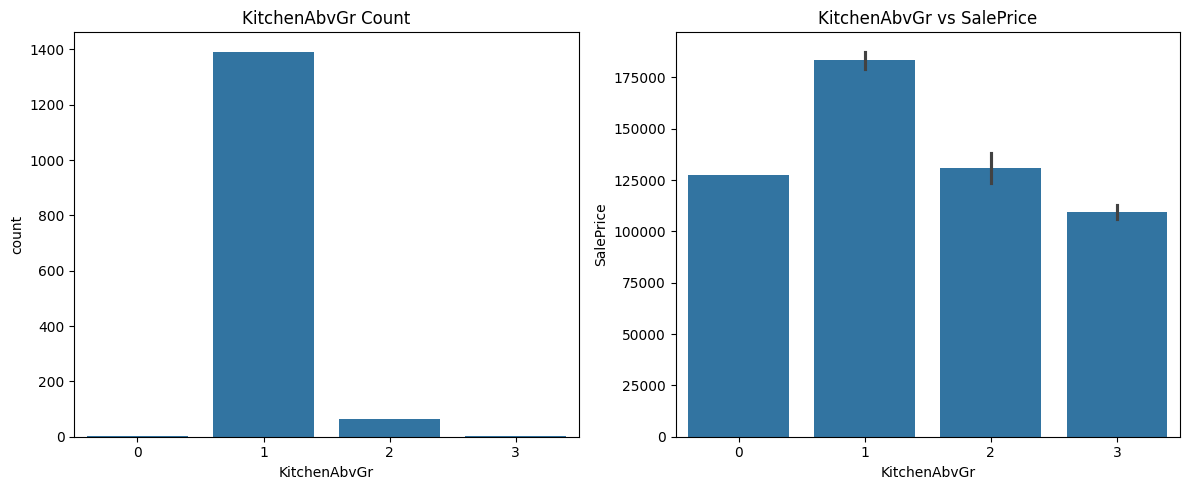

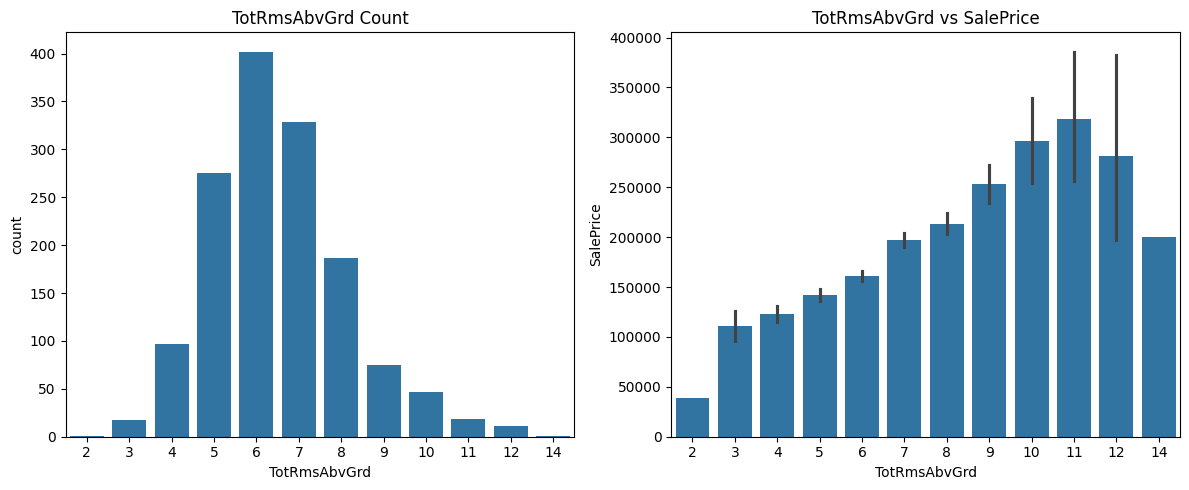

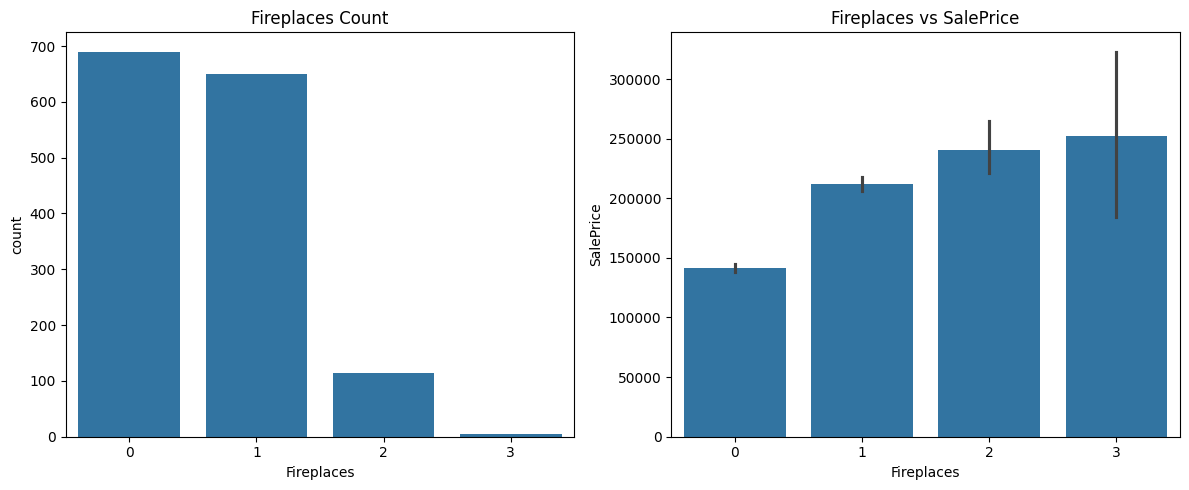

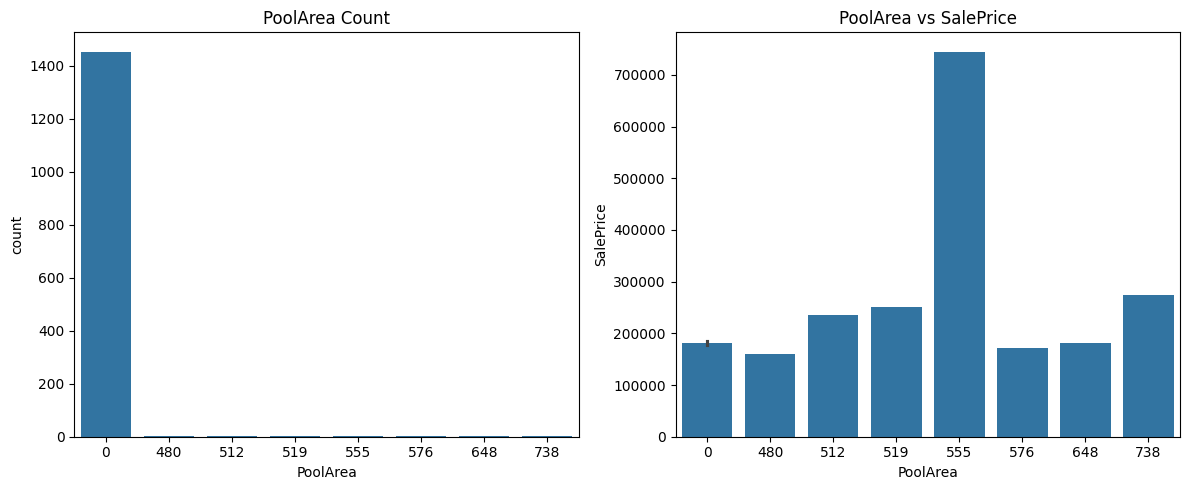

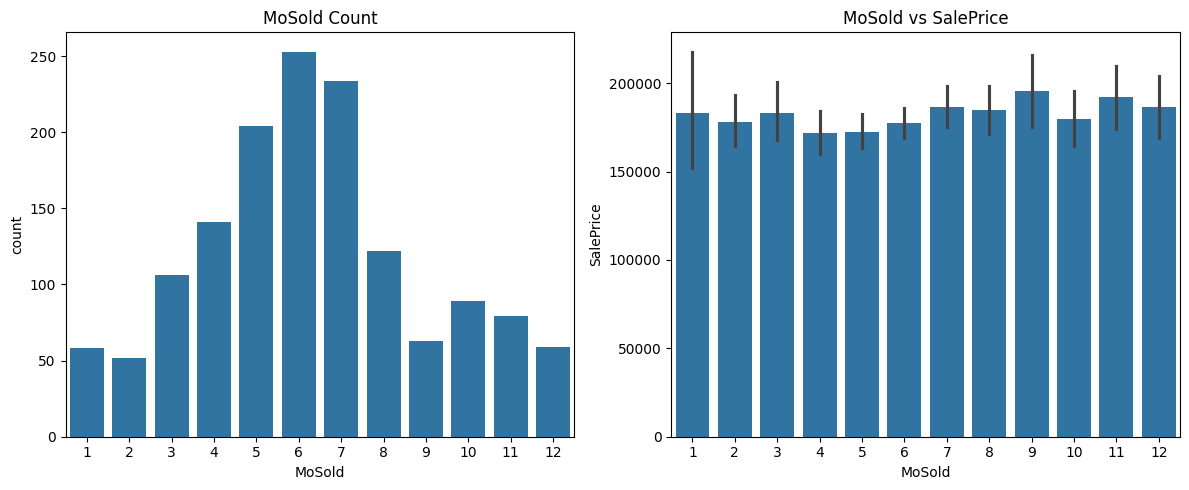

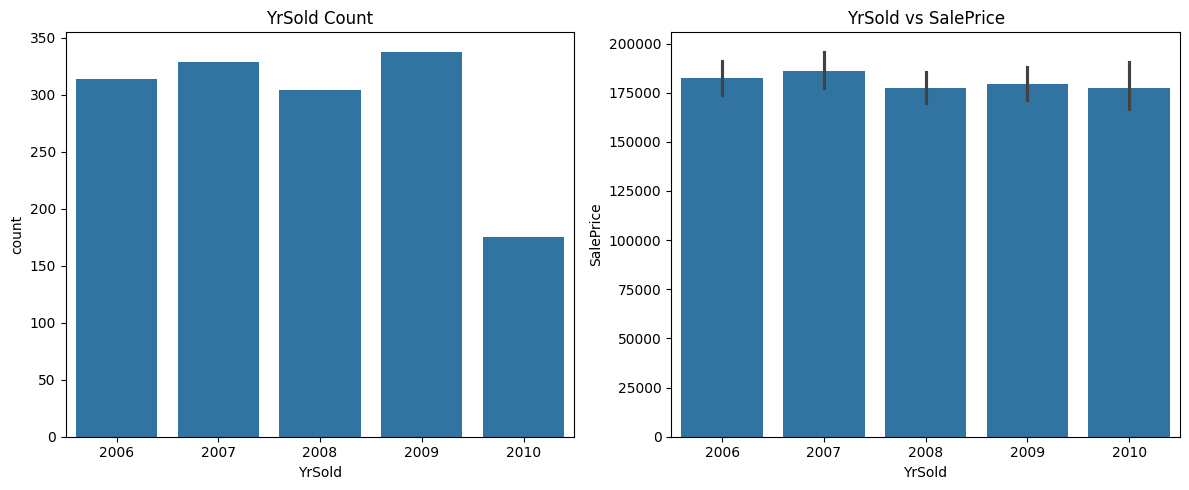

In [28]:
cat_cols_land_8 =['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold']
for feature in cat_cols_land_8:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    sns.countplot(data=df, x=feature, ax=axes[0])
    axes[0].set_title(f'{feature} Count')
    # axes[0].tick_params(axis='x', rotation=90)

    sns.barplot(data=df, x=feature, y='SalePrice', ax=axes[1])
    axes[1].set_title(f'{feature} vs SalePrice')
    # axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

Along with the increase in the number of rooms above ground, the average price increased to 11 rooms, after which there was a decline. The exponential curve is not visible for the number of bedrooms above ground, with prices highest for 0 bedrooms, followed by 4 and 8 bedrooms. The number of kitchens on the ground also influences the price, but with a decreasing trend as the number of kitchens increases. In particular, homes with one kitchen command the highest prices. Analysis of bathrooms shows that homes with 3 full bathrooms command the highest prices, while homes without bathrooms tend to be cheaper. The presence of a fireplace in the house and the size of the swimming pool also contribute to the increase in selling prices. Year of sale shows a slight decline from 2006 to 2010, while month of sale does not provide significant insight into home sales prices.

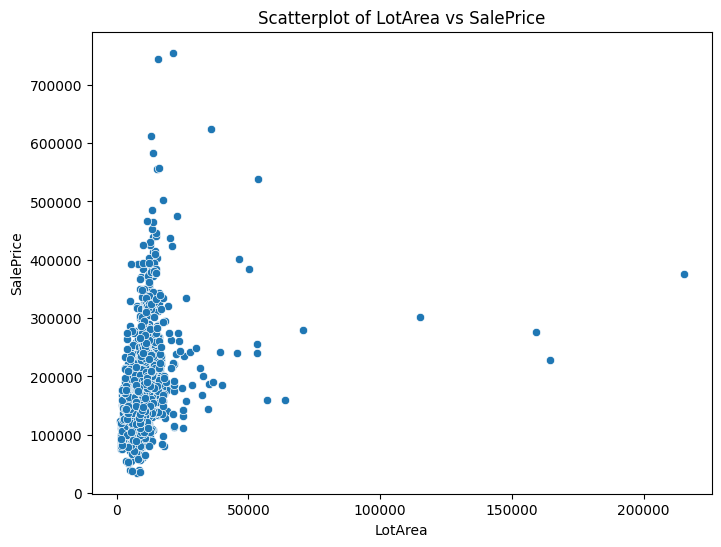

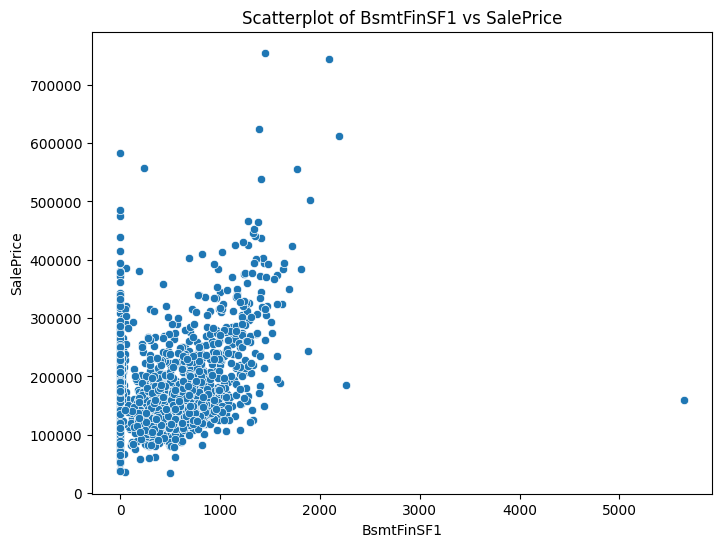

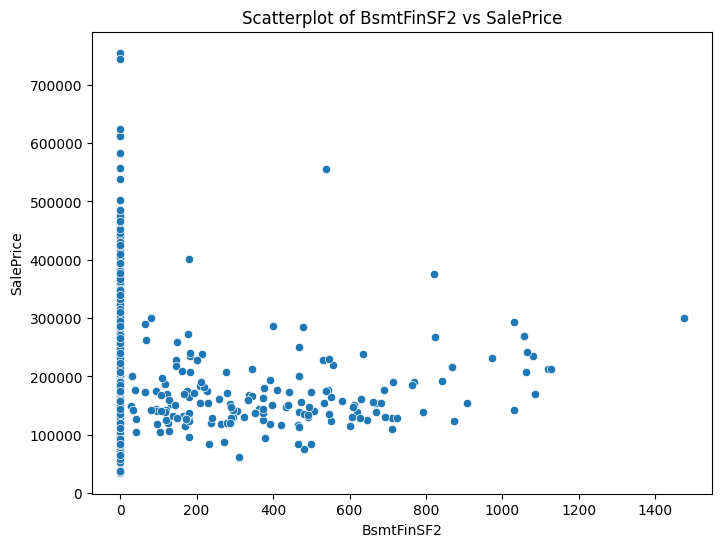

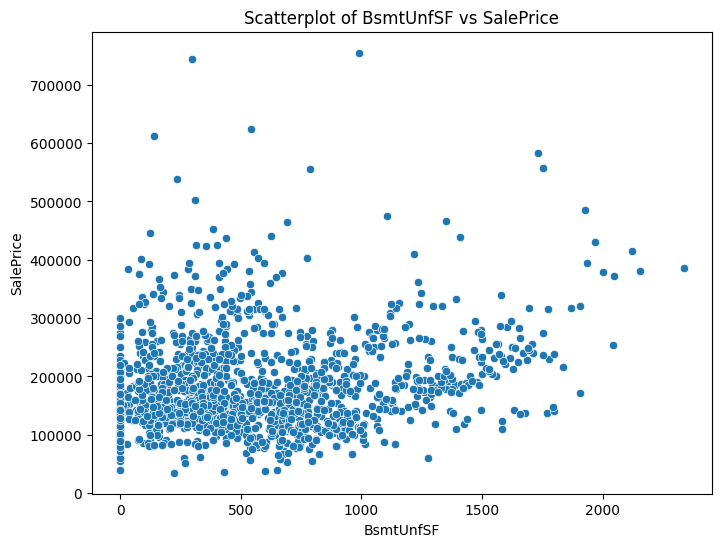

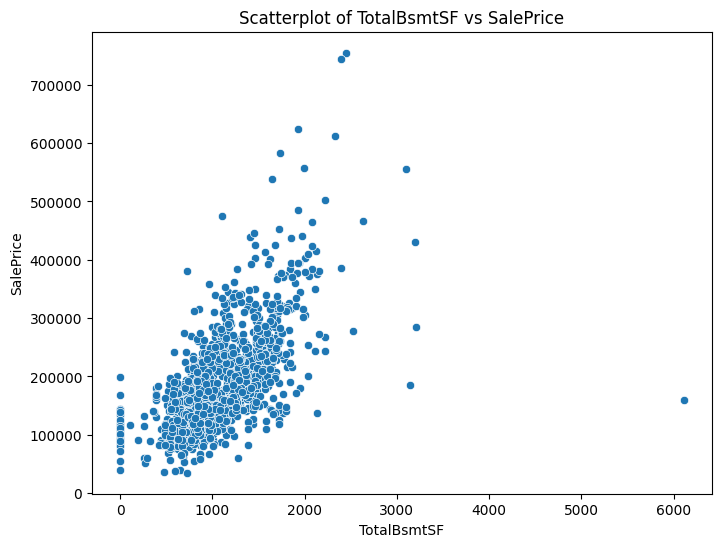

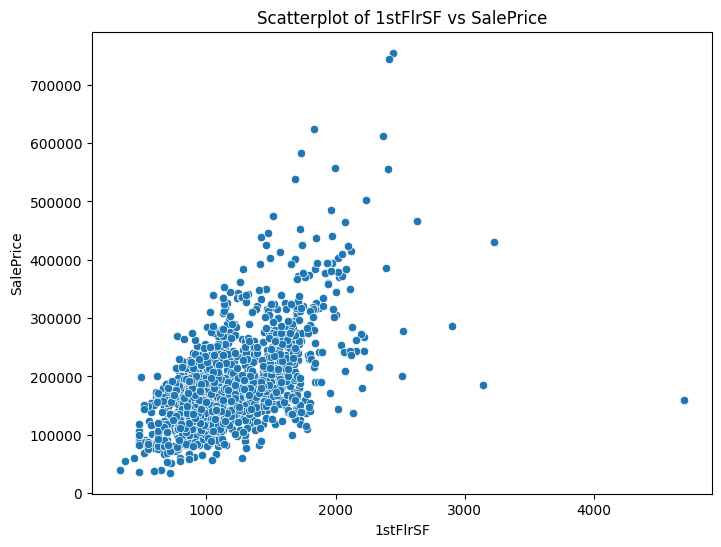

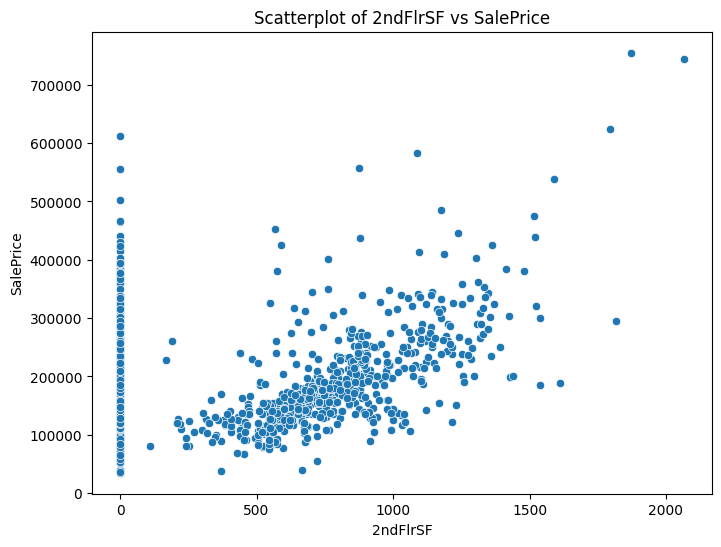

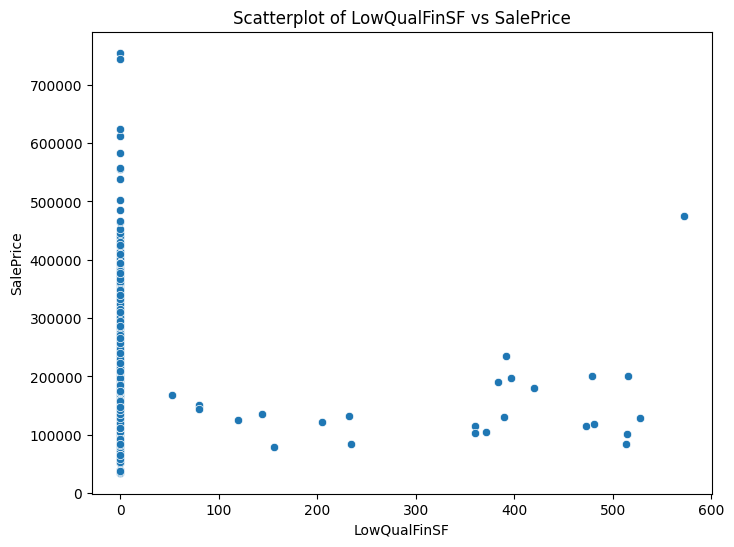

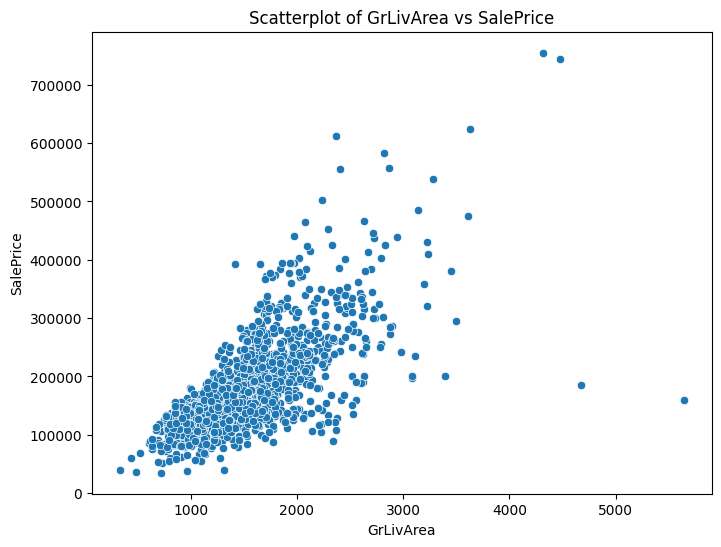

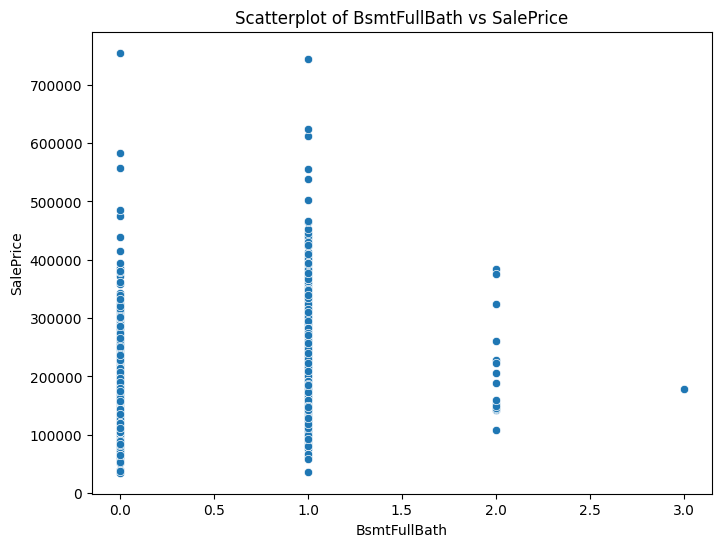

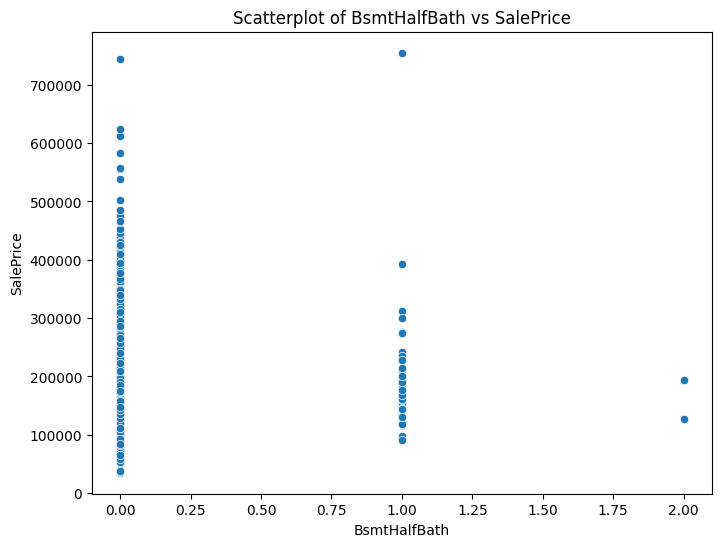

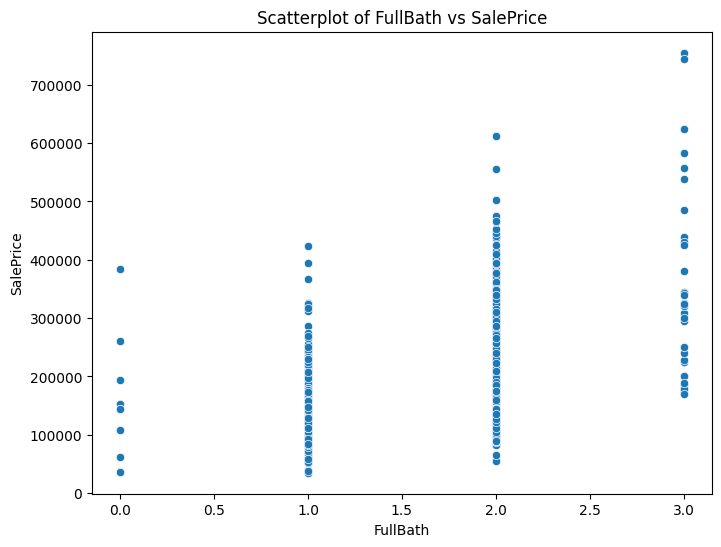

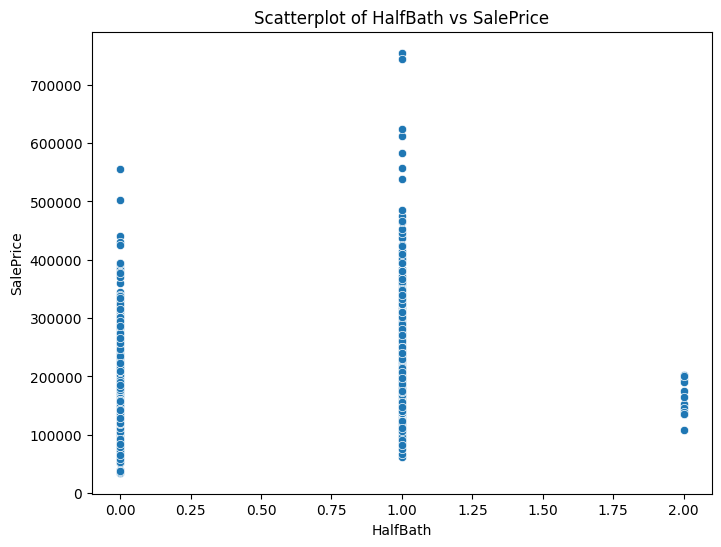

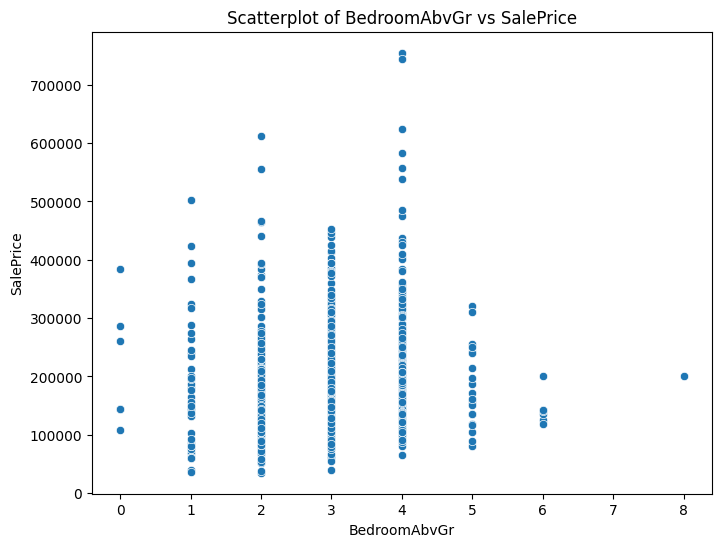

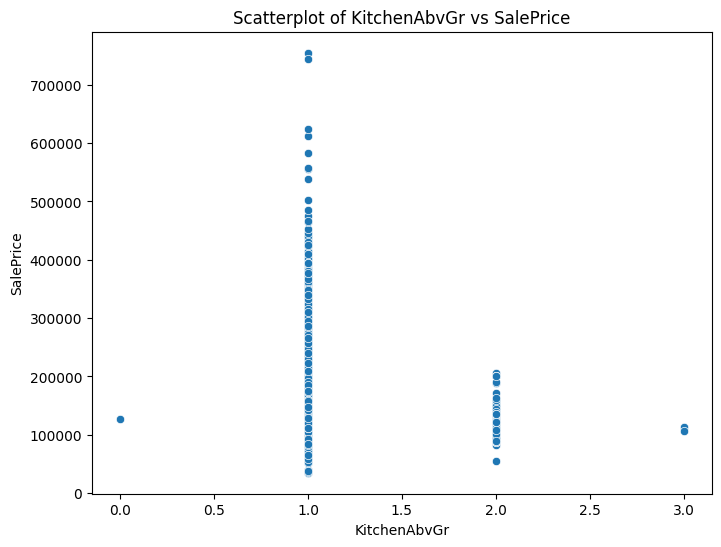

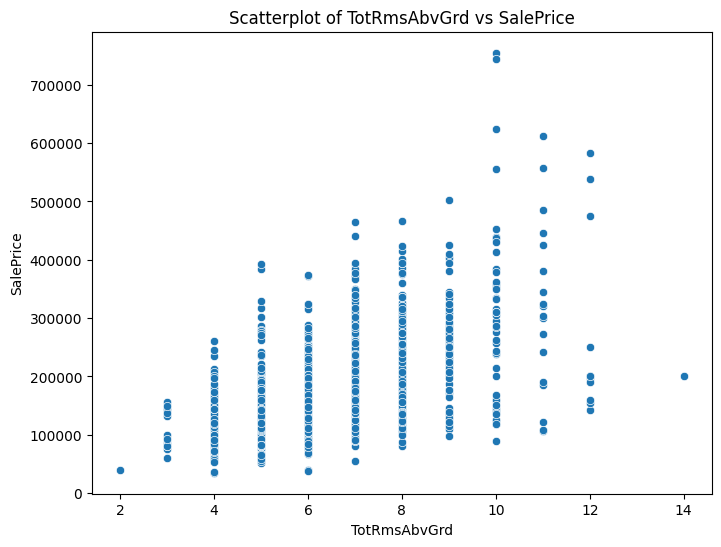

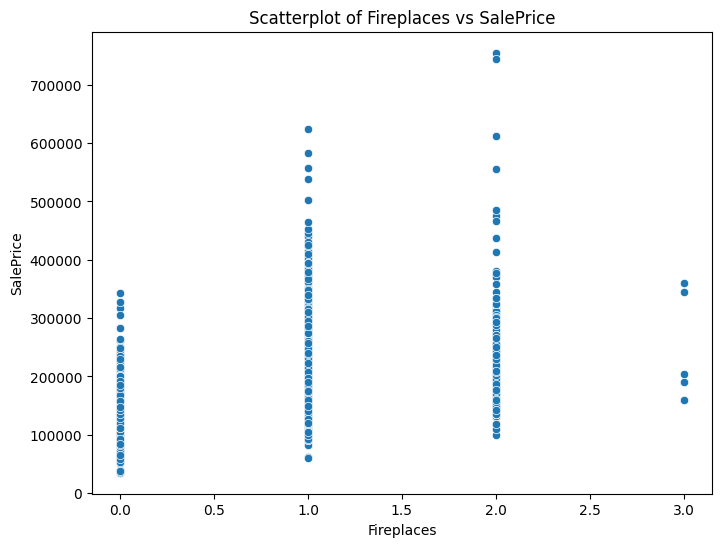

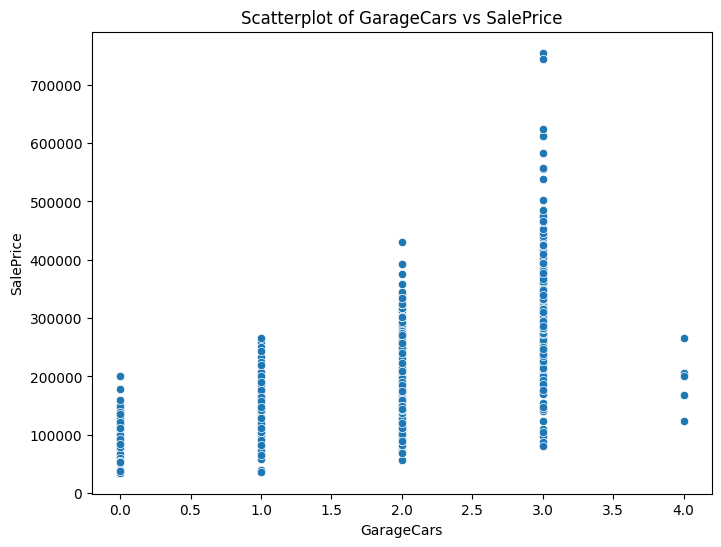

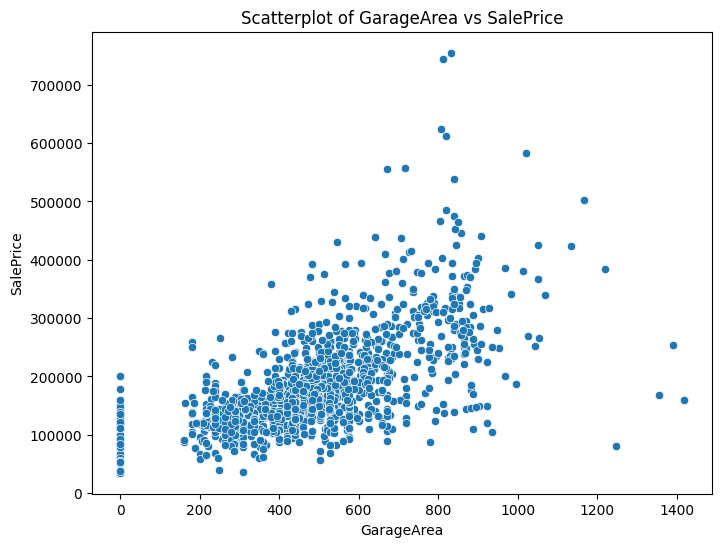

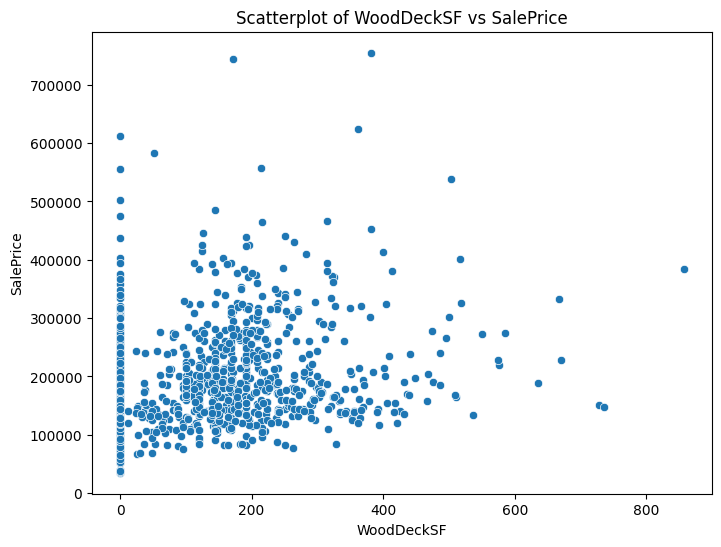

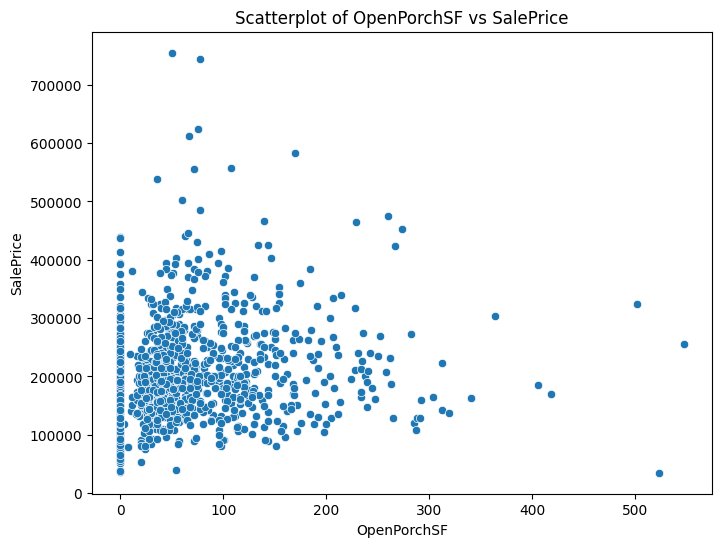

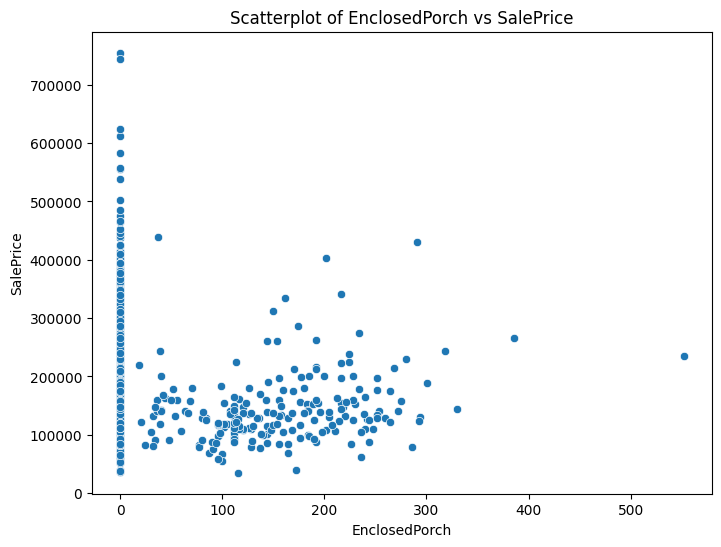

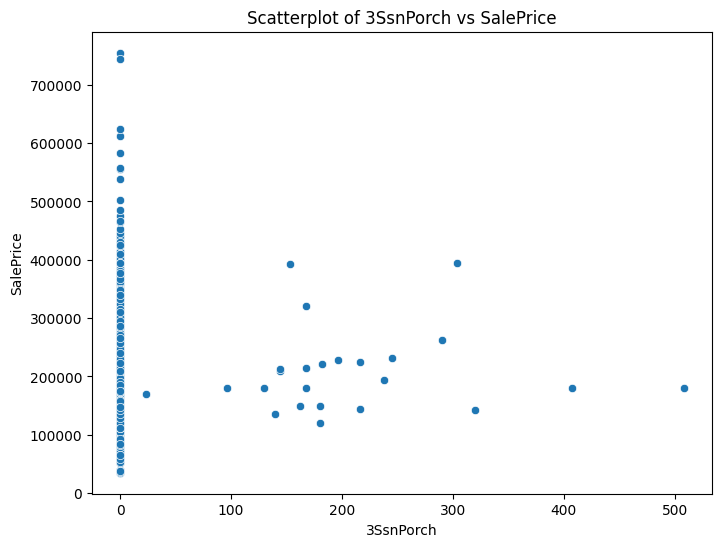

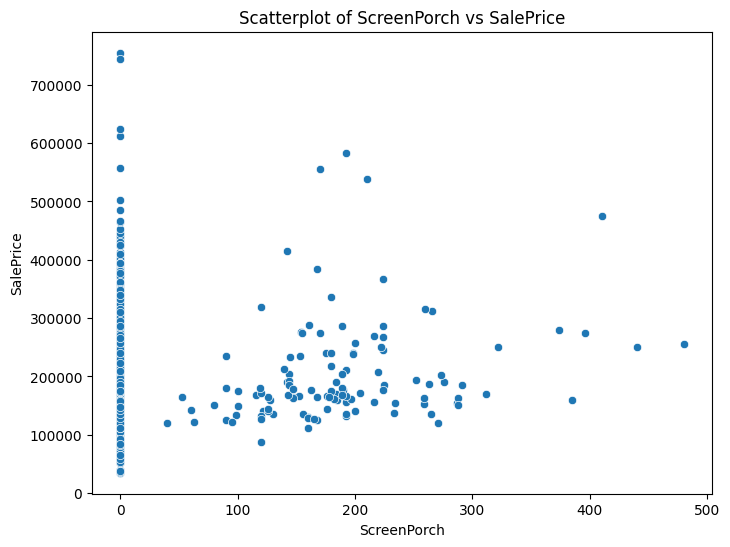

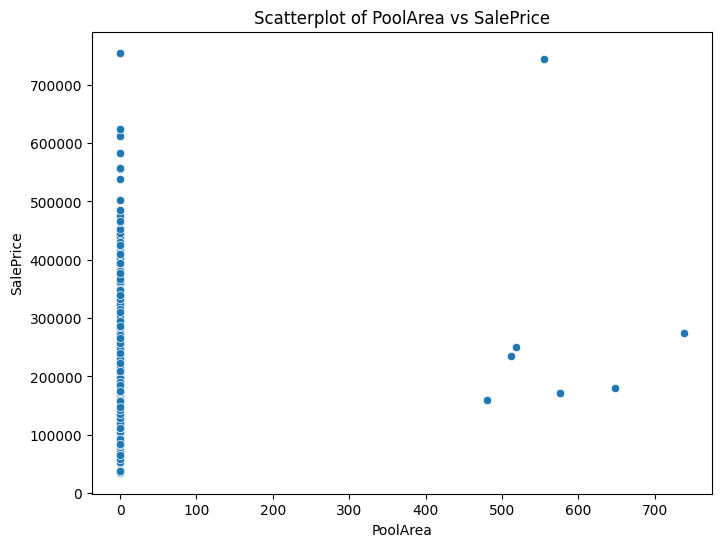

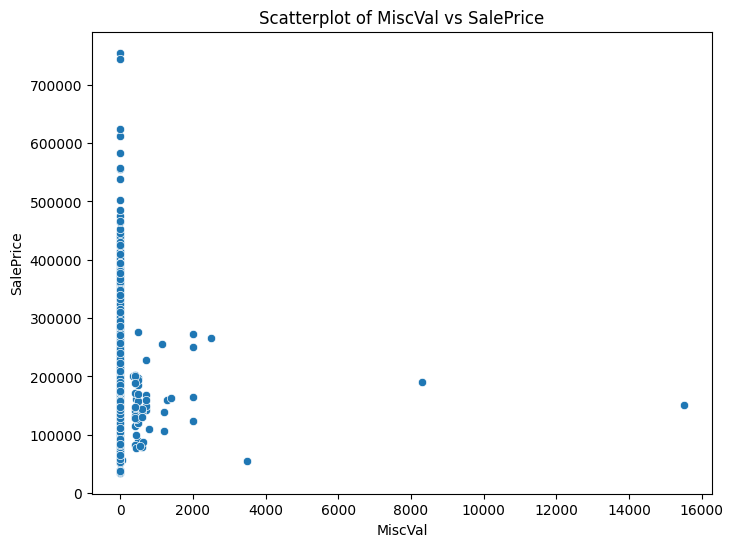

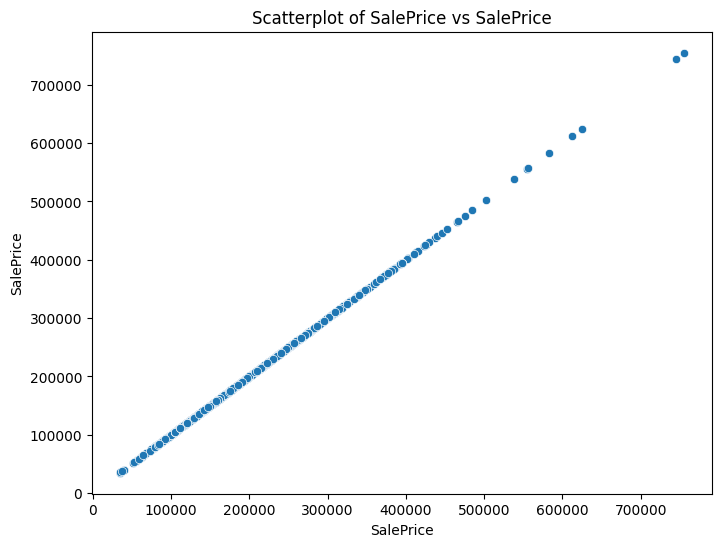

In [29]:
selected_numeric_columns = [col for col in df.columns if col not in ['Id','MSSubClass','OverallQual','OverallCond','YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt'] and df[col].dtype=='int64']

for col in selected_numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='SalePrice', data=df)
    plt.title(f'Scatterplot of {col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

As the number of features increases, the selling price increases, such as the total surface area of the Basement and the surface area of the 1st floor, Garage, Full Bath, TotRmsAbvGrd